<div style="color: #9867C5; font-size:24px; text-align:center;">Farah Mathlouthi 2BD2 : Laptops-Prices Prediction and Analysis Project</div>

<div style="color: #9867C5; font-size:32px; text-align:center;">PréTraitement</div>

<div style="color: #601A35; font-size:16px; text-align:left;"> 
Dataset used=> Kaggle : https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset
    </div>

<div style="color: #9867C5; font-size:24px; text-align:left;"> 

Objectif :</br> 1-  Examiner les différentes caractéristiques des ordinateurs portables sur le marché afin d'identifier les meilleurs</br> 2-  prédire les prix en fonction des caractéristiques de l'ordinateur portable.</br> 3-  Vérifier s'il existe une relation entre ces caractéristiques et le prix de l'ordinateur portable.</div>

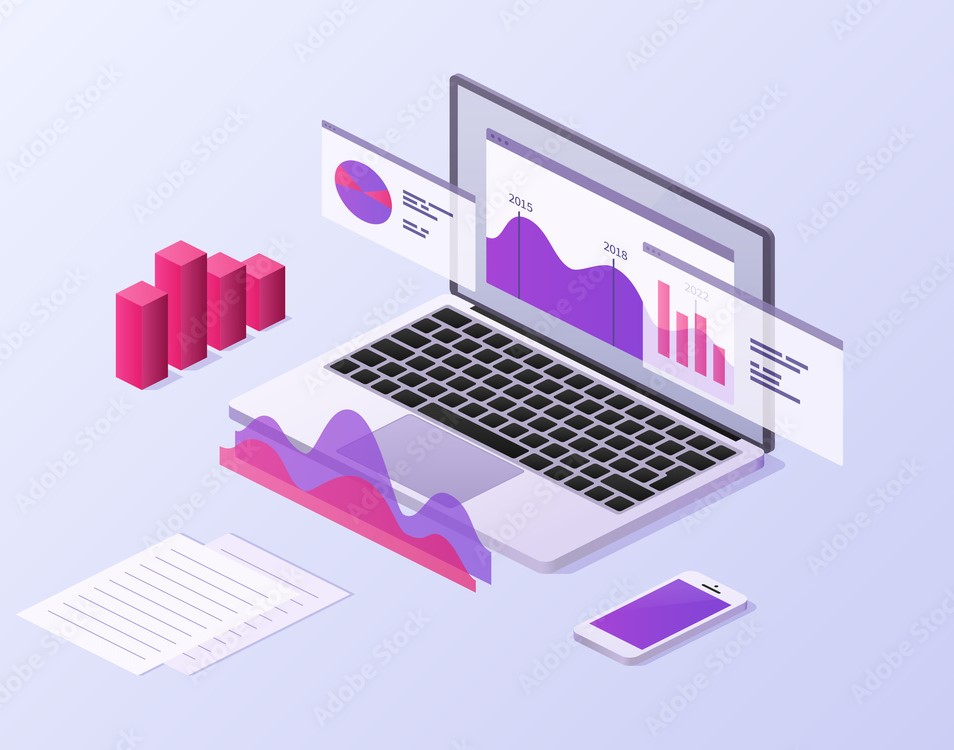


<div style="color: #601A35; font-size:16px; text-align:left;"> 
les Colonnes initiales dans le jeu de données : </br>
0   Laptop :  The unique identifier or model name of the laptop.</br>
1   Status : the laptop's state</br>            
2   Brand: Laptop brand.</br>
3   Model: Laptop brand model.</br>           
4   CPU (Central Processing Unit): The processor brand, model, and other relevant details.</br>                
5   RAM (Random Access Memory): The amount of memory available for multitasking.</br>                 
6   Storage</br>           
7   Storage type</br>      
8   GPU (Graphics Processing Unit): The graphics card brand, model, and associated specifications.</br>                
9   Screen Size</br>         
10  Touch screen</br>
11  Price </div>

In [145]:
# Importez pandas, numpy, pyplot de matplotlib et seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
custom_palette = sns.color_palette("Paired")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from colorama import Fore, Back, Style
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
#Lecture du fichier CSV
data = pd.read_csv(r"C:\DM Project\laptopsdata.csv")

In [3]:
#Mettre le fichier dans un DataFrame
laptop = pd.DataFrame(data)

In [4]:
#lecture des 5 premiers lignes
laptop.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [5]:
#lecture des 5 derniers lignes
laptop.tail()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99
2159,Razer Book FHD+ Intel Evo Core i7-1165G7/16GB/...,Refurbished,Razer,Book,Intel Evo Core i7,16,256,SSD,NaN,13.4,Yes,1699.99


In [6]:
#pour connaitre le nombre de lignes et de colonnes 
laptop.shape

(2160, 12)

In [7]:
#description pour les colonnes numériques
laptop.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [8]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [9]:
#pour connaitre le type de chaque colonne
print(laptop.dtypes)

Laptop           object
Status           object
Brand            object
Model            object
CPU              object
RAM               int64
Storage           int64
Storage type     object
GPU              object
Screen          float64
Touch            object
Final Price     float64
dtype: object


In [10]:
#Renommage de quelques colonnes 
laptop= laptop.rename(columns={"Touch": "Touch screen","Screen": "Screen Size","Final Price":"Price","Laptop": "Laptop's full Name"})
laptop.head()

,Laptop's full Name,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen Size,Touch screen,Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


<div style="color: #9867C5; font-size:32px; text-align:center;">Combien  de valeurs NaN?</div>

In [11]:
#le nombre de données manquantes dans chaque colonnes 
missing_values_count = laptop.isnull().sum()
print(missing_values_count)

Laptop's full Name       0
Status                   0
Brand                    0
Model                    0
CPU                      0
RAM                      0
Storage                  0
Storage type            42
GPU                   1371
Screen Size              4
Touch screen             0
Price                    0
dtype: int64


In [12]:
# combien de valeurs manquantes au total 
total_cells = np.product(laptop.shape)
total_missing = missing_values_count.sum()

# pourcentage du données manquantes 
percent_missing_values = (total_missing/total_cells) * 100
print(percent_missing_values)

5.466820987654321


In [13]:
#pour éliminer les lignes dupliqués et la redondance
laptop.drop_duplicates(inplace=True)

laptop.info()
laptop.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Laptop's full Name  2160 non-null   object 
 1   Status              2160 non-null   object 
 2   Brand               2160 non-null   object 
 3   Model               2160 non-null   object 
 4   CPU                 2160 non-null   object 
 5   RAM                 2160 non-null   int64  
 6   Storage             2160 non-null   int64  
 7   Storage type        2118 non-null   object 
 8   GPU                 789 non-null    object 
 9   Screen Size         2156 non-null   float64
 10  Touch screen        2160 non-null   object 
 11  Price               2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 219.4+ KB


(2160, 12)

In [14]:
missing_values_count1 = laptop['GPU'].isnull().sum()
# combien de valeurs manquantes dans la colonne "GPU"
total_cells1 = np.product(laptop.shape)
total_missing1 = missing_values_count1.sum()

# pourcentage du données de la colonne "GPU" qui manquent
percent_gpu_values = (total_missing1/total_cells1) * 100
print(percent_gpu_values)

5.289351851851852


In [15]:
# dealing with the missing data 'Missing' instead of NaN
columns_to_fill = ['CPU']
laptop[columns_to_fill] = laptop[columns_to_fill].fillna('Missing')
laptop['Screen Size'] = laptop['Screen Size'].fillna(0)
laptop['Storage type'] = laptop['Storage type'].fillna('NotMentioned')
laptop['GPU'] = laptop['GPU'].fillna('NotMentioned')
laptop.head()

,Laptop's full Name,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen Size,Touch screen,Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NotMentioned,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NotMentioned,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NotMentioned,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NotMentioned,15.6,No,669.01


In [16]:
#supprimer les lignes sans model 
laptop=laptop.dropna(subset=['Model'])
laptop.shape
laptop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Laptop's full Name  2160 non-null   object 
 1   Status              2160 non-null   object 
 2   Brand               2160 non-null   object 
 3   Model               2160 non-null   object 
 4   CPU                 2160 non-null   object 
 5   RAM                 2160 non-null   int64  
 6   Storage             2160 non-null   int64  
 7   Storage type        2160 non-null   object 
 8   GPU                 2160 non-null   object 
 9   Screen Size         2160 non-null   float64
 10  Touch screen        2160 non-null   object 
 11  Price               2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 219.4+ KB


In [17]:
# utiliser un dictionnaire pour "mapper" les valeurs de la colonne'Touch Screen' en 0 et 1 à la place de yes et no 
Yes_vs_No = {'Yes': 1, 'No': 0} 
laptop['Touch screen'] =laptop['Touch screen'].map(Yes_vs_No)
laptop['Touch screen'] =laptop['Touch screen'].astype('int64')
laptop.head()

,Laptop's full Name,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen Size,Touch screen,Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NotMentioned,15.6,0,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NotMentioned,15.6,0,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NotMentioned,15.6,0,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,0,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NotMentioned,15.6,0,669.01


<div style="color: #9867C5; font-size:32px; text-align:center;">Traitement des Colonnes </div>

<div style="color: #710193; font-size:24px; text-align:left;">1) column "Model" </div>

In [18]:
#to determine unique values in the "Model" Column without the NaN values
processor_models = laptop['Model'].value_counts(dropna=True)
processor_models

15S            115
IdeaPad        104
ROG            101
ThinkPad        99
VivoBook        99
              ... 
100w             1
Electronics      1
Cyborg           1
14S              1
GL75             1
Name: Model, Length: 121, dtype: int64

<div style="color: #710193; font-size:24px; text-align:left;">2) column "Brand" </div>

In [19]:
#to determine unique values in the "Brand" Column even the NaN values
laptop['Brand'].value_counts(dropna=False)

Asus                415
HP                  368
Lenovo              366
MSI                 308
Acer                137
Apple               116
Dell                 84
Microsoft            77
Gigabyte             48
Razer                37
Medion               32
LG                   32
Alurin               29
PcCom                24
Samsung              22
Dynabook Toshiba     19
Vant                 11
Primux                8
Deep Gaming           8
Innjoo                6
Thomson               4
Prixton               3
Millenium             2
Denver                1
Jetwing               1
Realme                1
Toshiba               1
Name: Brand, dtype: int64

In [20]:
#to determine unique values in the "Brand" Column without the NaN values
laptop['Brand'].value_counts(dropna=True)

Asus                415
HP                  368
Lenovo              366
MSI                 308
Acer                137
Apple               116
Dell                 84
Microsoft            77
Gigabyte             48
Razer                37
Medion               32
LG                   32
Alurin               29
PcCom                24
Samsung              22
Dynabook Toshiba     19
Vant                 11
Primux                8
Deep Gaming           8
Innjoo                6
Thomson               4
Prixton               3
Millenium             2
Denver                1
Jetwing               1
Realme                1
Toshiba               1
Name: Brand, dtype: int64

<div style="color: #710193; font-size:24px; text-align:left;">3) Column "CPU" : Processor </div>

In [21]:
#to determine unique values in the "CPU" Column even the NaN values
laptop['CPU'].value_counts(dropna=False)

Intel Core i7            710
Intel Core i5            535
AMD Ryzen 7              156
Intel Core i3            130
AMD Ryzen 5              127
Intel Core i9             94
Intel Celeron             94
Intel Evo Core i7         82
AMD Ryzen 9               44
AMD Ryzen 3               44
Intel Evo Core i5         30
Apple M2                  28
AMD 3020e                 13
Apple M2 Pro              13
Apple M1                  11
AMD Athlon                10
Intel Pentium             10
Apple M1 Pro               7
Intel Core M3              5
AMD 3015e                  3
Microsoft SQ1              3
Qualcomm Snapdragon 7      3
AMD Radeon 9               2
Qualcomm Snapdragon 8      2
Intel Evo Core i9          1
Mediatek MT8183            1
AMD 3015Ce                 1
AMD Radeon 5               1
Name: CPU, dtype: int64

In [22]:
#Creating a new column "CPU brand" from the column "CPU" : to explore CPU Brands in the market
laptop['CPU Brand '] = laptop['CPU'].str.split().str[0]
laptop.head()

,Laptop's full Name,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen Size,Touch screen,Price,CPU Brand
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NotMentioned,15.6,0,1009.00,Intel
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NotMentioned,15.6,0,299.00,Intel
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NotMentioned,15.6,0,789.00,Intel
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,0,1199.00,Intel
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NotMentioned,15.6,0,669.01,Intel


In [23]:
#to see the different CPU Brands
laptop['CPU Brand '].value_counts(dropna=False)

Intel        1691
AMD           401
Apple          59
Qualcomm        5
Microsoft       3
Mediatek        1
Name: CPU Brand , dtype: int64

In [24]:
# to extract the processor tier : processor version within each CPU 
processor_split = laptop['CPU'].str.split()
#+ adding a new Column "Processor tier"

# Extract the second and third words if available, otherwise concatenate the available words
laptop['Processor tier'] = processor_split.apply(lambda x: x[1] + ' ' + x[2] if len(x) > 2 else x[1])
laptop.head()

,Laptop's full Name,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen Size,Touch screen,Price,CPU Brand,Processor tier
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NotMentioned,15.6,0,1009.00,Intel,Core i5
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NotMentioned,15.6,0,299.00,Intel,Celeron
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NotMentioned,15.6,0,789.00,Intel,Core i3
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,0,1199.00,Intel,Core i7
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NotMentioned,15.6,0,669.01,Intel,Core i5


In [25]:
#to see the different "Processor tiers"
laptop['Processor tier'].value_counts(dropna=False)

Core i7         710
Core i5         535
Ryzen 7         156
Core i3         130
Ryzen 5         127
Evo Core        113
Celeron          94
Core i9          94
Ryzen 9          44
Ryzen 3          44
M2               28
3020e            13
M2 Pro           13
M1               11
Athlon           10
Pentium          10
M1 Pro            7
Core M3           5
Snapdragon 7      3
3015e             3
SQ1               3
Radeon 9          2
Snapdragon 8      2
Radeon 5          1
MT8183            1
3015Ce            1
Name: Processor tier, dtype: int64

<div style="color: #710193; font-size:24px; text-align:left;">4) Column "GPU" : Graphic Card </div>

In [26]:
#to determine unique values in the "GPU" Column even the NaN values
laptop['GPU'].value_counts(dropna=False)

NotMentioned          1371
RTX 3050               129
RTX 3060               122
RTX 3070                97
RTX 4060                62
RTX 3080                51
GTX 1650                50
RTX 4070                40
RTX 4050                33
RTX 2070                25
RTX 2060                20
RTX 4080                18
RTX 4090                17
GTX 1660                14
RTX 2050                11
Radeon Pro 5500M         9
RTX A2000                8
MX 450                   7
RTX A3000                7
RTX 2080                 7
RTX A1000                6
T 1200                   6
T 500                    5
MX 330                   5
MX 550                   5
T 550                    4
RX 6500M                 3
RTX A5500                3
GTX 1050                 3
Radeon Pro RX 560X       3
Radeon Pro 5300M         2
T 600                    2
RX 7600S                 2
610 M                    2
P 500                    1
RX 6700M                 1
MX 130                   1
A

In [27]:
#to determine unique values in the "GPU" Column without the NaN values
laptop['GPU'].value_counts(dropna=True)

NotMentioned          1371
RTX 3050               129
RTX 3060               122
RTX 3070                97
RTX 4060                62
RTX 3080                51
GTX 1650                50
RTX 4070                40
RTX 4050                33
RTX 2070                25
RTX 2060                20
RTX 4080                18
RTX 4090                17
GTX 1660                14
RTX 2050                11
Radeon Pro 5500M         9
RTX A2000                8
MX 450                   7
RTX A3000                7
RTX 2080                 7
RTX A1000                6
T 1200                   6
T 500                    5
MX 330                   5
MX 550                   5
T 550                    4
RX 6500M                 3
RTX A5500                3
GTX 1050                 3
Radeon Pro RX 560X       3
Radeon Pro 5300M         2
T 600                    2
RX 7600S                 2
610 M                    2
P 500                    1
RX 6700M                 1
MX 130                   1
A

In [28]:
# searching for different GPU brands: 
GPU_Brands = laptop['GPU'].str.split().str[0].dropna().unique()
GPU_Brands

array(['NotMentioned', 'RTX', 'GTX', '610', 'RX', 'MX', 'A', 'T',
       'Radeon', 'P'], dtype=object)

In [29]:
# adding a new Column "GPU Brand" to see the different GPU Brands in the market
laptop['GPU Brand'] = laptop['GPU'].str.split().str[0]
laptop.head()

,Laptop's full Name,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen Size,Touch screen,Price,CPU Brand,Processor tier,GPU Brand
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NotMentioned,15.6,0,1009.00,Intel,Core i5,NotMentioned
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NotMentioned,15.6,0,299.00,Intel,Celeron,NotMentioned
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NotMentioned,15.6,0,789.00,Intel,Core i3,NotMentioned
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,0,1199.00,Intel,Core i7,RTX
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NotMentioned,15.6,0,669.01,Intel,Core i5,NotMentioned


In [30]:
#to determine unique values in the "GPU Brand" Column 
laptop['GPU Brand'].value_counts(dropna=True)

NotMentioned    1371
RTX              657
GTX               68
T                 19
MX                18
Radeon            15
RX                 7
610                2
A                  2
P                  1
Name: GPU Brand, dtype: int64

def add_new_column(df, column1, new_column_name):
    df[new_column_name] = df[column1[1]].astype(str) + "" + df[column1[2]].astype(str)
    return df
add_new_column(laptop, laptop['CPU'], 'Processor tier')
laptop.head()

<div style="color: #710193; font-size:24px; text-align:left;">5) column "RAM" : Random Access Memory</div>

In [31]:
#to determine unique values in the "GPU" Column with the NaN values
laptop['RAM'].value_counts(dropna=False)

16     928
8      817
32     301
4       68
64      25
12      15
6        3
40       2
128      1
Name: RAM, dtype: int64

<div style="color: #710193; font-size:24px; text-align:left;">6) column "Screen Size" : to see different screen sizes possible</div>

In [32]:
#to determine unique values in the "Screen Size" Column with the NaN values
laptop['Screen Size'].value_counts(dropna=False)

15.60    1009
14.00     392
16.00     174
17.30     161
13.30     131
16.10      48
17.00      33
13.00      27
15.00      21
13.40      19
13.50      19
11.60      16
14.20      14
12.30      13
14.10      11
13.60      11
16.20      10
15.30       8
10.50       7
14.40       6
12.40       6
15.40       5
0.00        4
12.00       4
14.50       3
18.00       3
13.90       2
12.50       1
10.10       1
10.95       1
Name: Screen Size, dtype: int64

<div style="color: #710193; font-size:24px; text-align:left;">7) Column "Storage" : storage Capacity</div>

In [33]:
#to determine unique values in the "Storage" Column without the NaN values
laptop['Storage'].value_counts(dropna=True)

512     941
1000    570
256     450
128      67
2000     42
500      37
64       35
32       14
0         1
4000      1
3000      1
240       1
Name: Storage, dtype: int64

<div style="color: #710193; font-size:24px; text-align:left;">8) Column "Storage type"</div>

In [34]:
#to determine unique values in the "Storage type" Column with the NaN values
laptop['Storage type'].value_counts(dropna=False)

SSD             2062
eMMC              56
NotMentioned      42
Name: Storage type, dtype: int64

<div style="color: #710193; font-size:24px; text-align:left;">9) Column "Touch screen" : screen additional functionality </div>

In [35]:
#to determine unique values in the "Touch screen" Column with the NaN values
laptop['Touch screen'].value_counts(dropna=False)

0    1933
1     227
Name: Touch screen, dtype: int64

<div style="color: #710193; font-size:24px; text-align:left;">10) Column Status</div>

In [36]:
#to determine unique values in the "Storage type" Column with the NaN values
laptop["Status"].value_counts(dropna=False)

New            1498
Refurbished     662
Name: Status, dtype: int64

<div style="color: #710193; font-size:24px; text-align:left;">11) Column "Price"</div>

In [37]:
# searching for the price in TND , adding a new column
def INR_to_TND(df, column_1, new_column):
   df[new_column] = df[column_1].astype('float64') * 3.14
   return df

laptop = INR_to_TND(laptop,'Price','Price_in_TND')
laptop.head()

,Laptop's full Name,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen Size,Touch screen,Price,CPU Brand,Processor tier,GPU Brand,Price_in_TND
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NotMentioned,15.6,0,1009.00,Intel,Core i5,NotMentioned,3168.2600
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NotMentioned,15.6,0,299.00,Intel,Celeron,NotMentioned,938.8600
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NotMentioned,15.6,0,789.00,Intel,Core i3,NotMentioned,2477.4600
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,0,1199.00,Intel,Core i7,RTX,3764.8600
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NotMentioned,15.6,0,669.01,Intel,Core i5,NotMentioned,2100.6914


In [38]:
# arrange the rows by Price descending
sorted_laptop = laptop.sort_values(by='Price_in_TND', ascending=False)
sorted_laptop

,Laptop's full Name,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen Size,Touch screen,Price,CPU Brand,Processor tier,GPU Brand,Price_in_TND
1099,MSI Raider GE78HX 13VH-065ES Intel Core i9-139...,New,MSI,Raider,Intel Core i9,32,2000,SSD,RTX 4080,17.0,0,7150.47,Intel,Core i9,RTX,22452.4758
478,MSI Titan GT77 HX 13VI-006ES Intel Core i9-139...,New,MSI,Titan,Intel Core i9,128,2000,SSD,RTX 4090,17.3,0,5999.00,Intel,Core i9,RTX,18836.8600
1202,ASUS ROG Strix SCAR 18 G834JY-93B49PB1 Intel C...,New,Asus,ROG,Intel Core i9,64,2000,SSD,RTX 4090,16.0,0,5758.14,Intel,Core i9,RTX,18080.5596
1245,ASUS ROG Strix Scar 17 G733PY-R97B49PB1 AMD R...,New,Asus,ROG,AMD Radeon 9,32,2000,SSD,RTX 4090,17.3,0,5630.90,AMD,Radeon 9,RTX,17681.0260
1475,HP ZBook Studio G8 Intel Core i7-11850H/16GB/5...,New,HP,Zbook,Intel Core i7,16,512,SSD,RTX A3000,15.6,0,5368.77,Intel,Core i7,RTX,16857.9378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,HP Chromebook 11 G9 Intel Celeron N4500/4GB/32...,New,HP,Chromebook,Intel Celeron,4,32,NotMentioned,NotMentioned,11.6,0,230.14,Intel,Celeron,NotMentioned,722.6396
554,Primux Ioxbook 15CA Intel Celeron N4000/8GB/25...,New,Primux,Ioxbook,Intel Celeron,8,256,SSD,NotMentioned,15.6,0,229.00,Intel,Celeron,NotMentioned,719.0600
638,HP EliteBook 840 G3 Intel Core i5-6200U/8GB/25...,Refurbished,HP,EliteBook,Intel Core i5,8,256,SSD,NotMentioned,14.0,0,210.14,Intel,Core i5,NotMentioned,659.8396
505,Primux ioxbook 1406F Intel Celeron N4000/4 GB/...,New,Primux,Ioxbook,Intel Celeron,4,128,SSD,NotMentioned,14.0,0,208.99,Intel,Celeron,NotMentioned,656.2286


In [39]:
#to determine unique values in the "Price_in_TND" Column without the NaN values
laptop['Price_in_TND'].value_counts(dropna=True)

3136.8600    27
6276.8600    25
2194.8600    23
2508.8600    23
5020.8600    21
             ..
4318.4420     1
1241.5560     1
2926.9510     1
4191.9314     1
5337.9686     1
Name: Price_in_TND, Length: 1440, dtype: int64

In [40]:
# searching for the min + max + mean + median price
print('max : ' + str(laptop['Price_in_TND'].max()))
print('min : ' + str(laptop['Price_in_TND'].min()))
print('mean : ' + str(laptop['Price_in_TND'].mean()))
print('median : ' + str(laptop['Price_in_TND'].median()))

max : 22452.4758
min : 631.297
mean : 4121.684919074079
median : 3240.3073000000004


In [41]:
laptop.shape

(2160, 16)

In [42]:
laptop.describe()

,RAM,Storage,Screen Size,Touch screen,Price,Price_in_TND
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000
mean,15.413889,596.294444,15.140023,0.105093,1312.638509,4121.684919
std,9.867815,361.220506,1.367766,0.306744,911.475417,2862.032809
min,4.000000,0.000000,0.000000,0.000000,201.050000,631.297000
25%,8.000000,256.000000,14.000000,0.000000,661.082500,2075.799050
50%,16.000000,512.000000,15.600000,0.000000,1031.945000,3240.307300
75%,16.000000,1000.000000,15.600000,0.000000,1708.970000,5366.165800
max,128.000000,4000.000000,18.000000,1.000000,7150.470000,22452.475800


In [43]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2159
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Laptop's full Name  2160 non-null   object 
 1   Status              2160 non-null   object 
 2   Brand               2160 non-null   object 
 3   Model               2160 non-null   object 
 4   CPU                 2160 non-null   object 
 5   RAM                 2160 non-null   int64  
 6   Storage             2160 non-null   int64  
 7   Storage type        2160 non-null   object 
 8   GPU                 2160 non-null   object 
 9   Screen Size         2160 non-null   float64
 10  Touch screen        2160 non-null   int64  
 11  Price               2160 non-null   float64
 12  CPU Brand           2160 non-null   object 
 13  Processor tier      2160 non-null   object 
 14  GPU Brand           2160 non-null   object 
 15  Price_in_TND        2160 non-null   float64
dtypes: flo

In [44]:
# Importation du module stats
from scipy import stats
# IQR de la variable 'total_bill'
laptop.describe(include = 'all' )

,Laptop's full Name,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen Size,Touch screen,Price,CPU Brand,Processor tier,GPU Brand,Price_in_TND
count,2160,2160,2160,2160,2160,2160.000000,2160.000000,2160,2160,2160.000000,2160.000000,2160.000000,2160,2160,2160,2160.000000
unique,2160,2,27,121,28,NaN,NaN,3,45,NaN,NaN,NaN,6,26,10,NaN
top,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,15S,Intel Core i7,NaN,NaN,SSD,NotMentioned,NaN,NaN,NaN,Intel,Core i7,NotMentioned,NaN
freq,1,1498,415,115,710,NaN,NaN,2062,1371,NaN,NaN,NaN,1691,710,1371,NaN
mean,NaN,NaN,NaN,NaN,NaN,15.413889,596.294444,NaN,NaN,15.140023,0.105093,1312.638509,NaN,NaN,NaN,4121.684919
std,NaN,NaN,NaN,NaN,NaN,9.867815,361.220506,NaN,NaN,1.367766,0.306744,911.475417,NaN,NaN,NaN,2862.032809
min,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000,NaN,NaN,0.000000,0.000000,201.050000,NaN,NaN,NaN,631.297000
25%,NaN,NaN,NaN,NaN,NaN,8.000000,256.000000,NaN,NaN,14.000000,0.000000,661.082500,NaN,NaN,NaN,2075.799050
50%,NaN,NaN,NaN,NaN,NaN,16.000000,512.000000,NaN,NaN,15.600000,0.000000,1031.945000,NaN,NaN,NaN,3240.307300
75%,NaN,NaN,NaN,NaN,NaN,16.000000,1000.000000,NaN,NaN,15.600000,0.000000,1708.970000,NaN,NaN,NaN,5366.165800


<div style="color: #77C3EC; font-size:33px; text-align:center;">Visualisations:</div>

# we will be using "Barplots" to display the distribution of categorical variables or to compare them.

Asus                415
HP                  368
Lenovo              366
MSI                 308
Acer                137
Apple               116
Dell                 84
Microsoft            77
Gigabyte             48
Razer                37
Medion               32
LG                   32
Alurin               29
PcCom                24
Samsung              22
Dynabook Toshiba     19
Vant                 11
Primux                8
Deep Gaming           8
Innjoo                6
Thomson               4
Prixton               3
Millenium             2
Denver                1
Jetwing               1
Realme                1
Toshiba               1
Name: Brand, dtype: int64


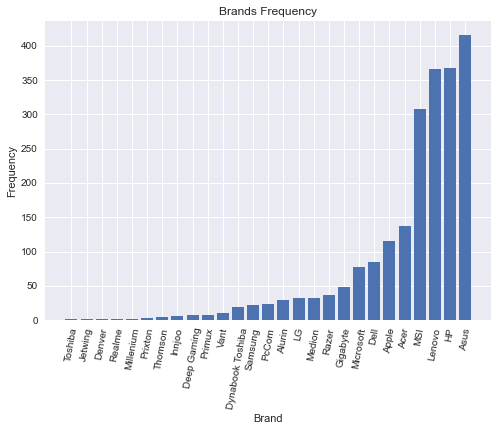

In [45]:
# to show the frequency table of the "Brand"
Brand_count = laptop['Brand'].value_counts()
print(Brand_count)
# BarPlot of the Laptops Brands Distribution
sorted_frequency_table = Brand_count.sort_values()
plt.bar(sorted_frequency_table.index, sorted_frequency_table)
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.title('Brands Frequency')
plt.xticks(rotation=80)  # Rotate x-axis labels for better readability
plt.show()



<div style="color: #133BBE; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
  This bar chart shows the distribution of laptops among different brands. Brand "Asus" appears to have the highest number of laptops( more than 400 here ) , followed by Brand "HP" and Brand "Lenovo". Brand "Toshiba" seems to have the lowest number of laptops.
</div>

<AxesSubplot:xlabel='Brand', ylabel='count'>

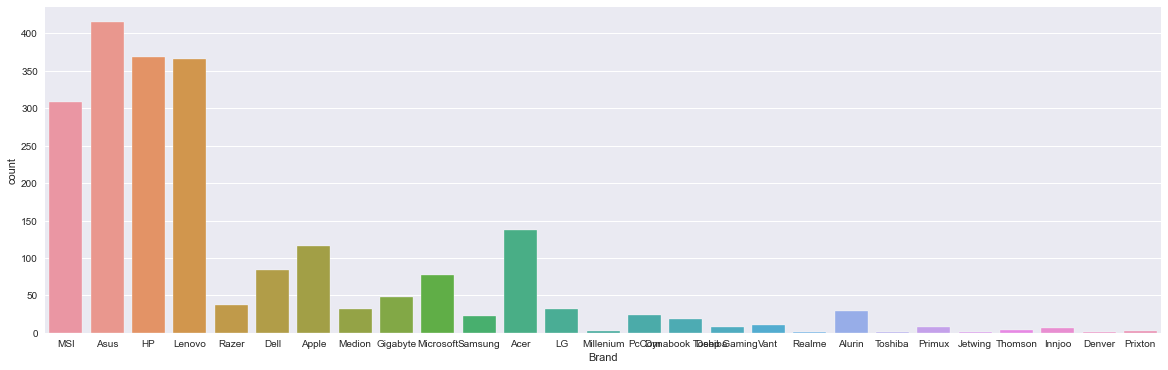

In [198]:
laptop['Brand'].value_counts()
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="Brand", data=laptop, ax=ax)

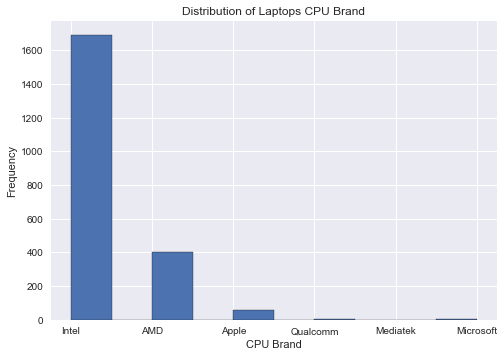

In [46]:
# BarPlot of the CPU Brands Distribution:
plt.hist(laptop['CPU Brand '], bins=10, edgecolor='black')
plt.xlabel('CPU Brand')
plt.ylabel('Frequency')
plt.title('Distribution of Laptops CPU Brand')
plt.show()

<div style="color: #133BBE; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
    This Histogram shows the distribution of laptops among different Processor brands. Brand "intel" appears to have the highest number of laptops of more than 1600 laptop , followed by Brand "AMD" and Brand "Apple".
</div>

Intel Core i7            710
Intel Core i5            535
AMD Ryzen 7              156
Intel Core i3            130
AMD Ryzen 5              127
Intel Core i9             94
Intel Celeron             94
Intel Evo Core i7         82
AMD Ryzen 9               44
AMD Ryzen 3               44
Intel Evo Core i5         30
Apple M2                  28
AMD 3020e                 13
Apple M2 Pro              13
Apple M1                  11
AMD Athlon                10
Intel Pentium             10
Apple M1 Pro               7
Intel Core M3              5
AMD 3015e                  3
Microsoft SQ1              3
Qualcomm Snapdragon 7      3
AMD Radeon 9               2
Qualcomm Snapdragon 8      2
Intel Evo Core i9          1
Mediatek MT8183            1
AMD 3015Ce                 1
AMD Radeon 5               1
Name: CPU, dtype: int64


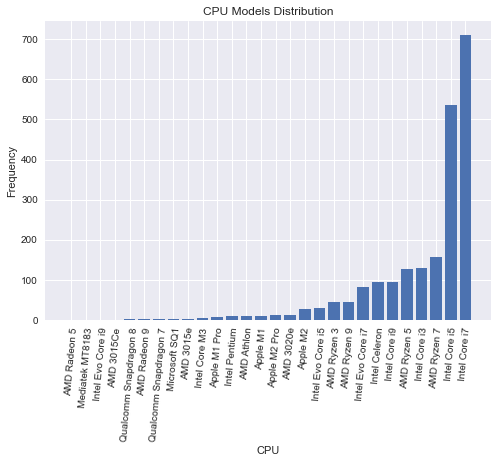

In [47]:
# to show the frequency table of the "CPU"
CPU_f = laptop['CPU'].value_counts()
print(CPU_f)
# BarPlot of the CPU Models distribution
sorted_frequency_table = CPU_f.sort_values()
plt.bar(sorted_frequency_table.index, sorted_frequency_table)
plt.xlabel('CPU')
plt.ylabel('Frequency')
plt.title('CPU Models Distribution')
plt.xticks(rotation=85)
plt.show()

<div style="color: #133BBE; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
    This bar chart shows the distribution of laptops among different CPU Models. The most common CPU models here are the "Intel Core 5 and 7" ( more than 700 and 500 laptops respectively ) and the "AMD Ryzen 7" 
</div>

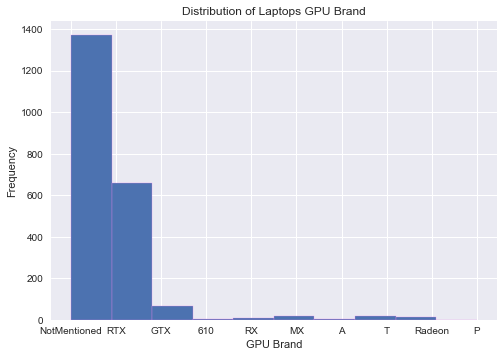

In [48]:
#Barplot of the GPU 
plt.hist(laptop['GPU Brand'], bins=10, edgecolor='violet')
plt.xlabel('GPU Brand')
plt.ylabel('Frequency')
plt.title('Distribution of Laptops GPU Brand')
plt.show()

<div style="color: #133BBE; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
    This Histogram shows the distribution of laptops among different GPU Brands. Brand "RTX" appears to have the highest number of laptops ( of more than 600 laptop ) , followed by Brand "GTX" => they Both belongs to the NVIDIA Company
</div>

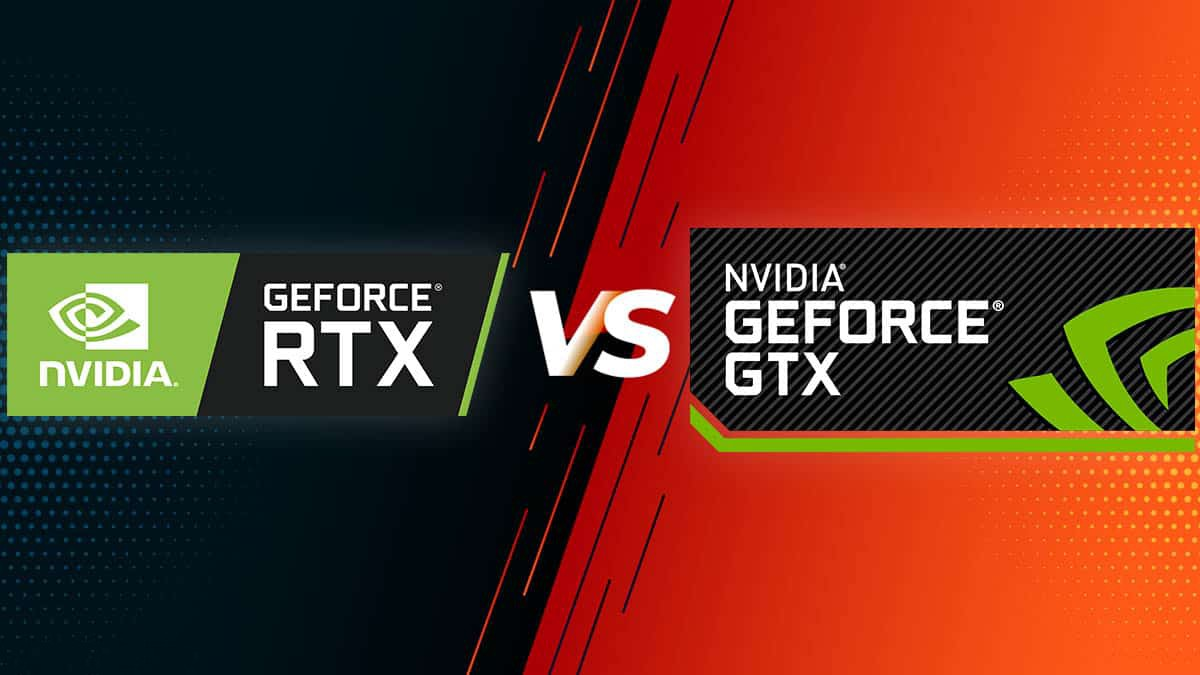

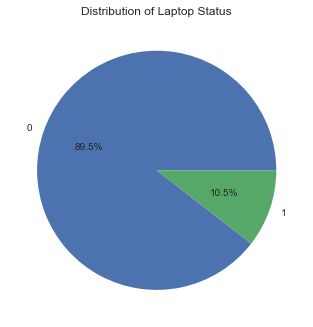

In [49]:
#Pie chart of the Distribution of laptops having a "touch screen"
status_counts = laptop['Touch screen'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Laptop Status')
plt.show()

<div style="color: #133BBE; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
  This pie chart illustrates the proportion of laptops having a "Touch Screen" . Most laptops don't ( 89,5 %) , while a smaller portion do ( just 10.5% )  
</div>

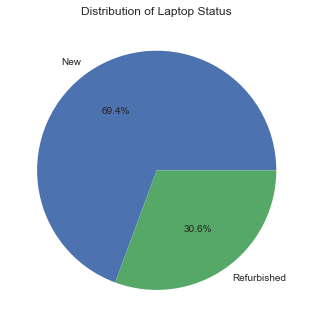

In [50]:
#Pie chart of the Distribution of laptops status
status_counts = laptop['Status'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Laptop Status')
plt.show()

<div style="color: #028A0F; font-size: 16px; text-align: left;">
     <h2>Interpretation:</h2>
 This pie chart illustrates the proportion of laptops in different statuses. Most laptops are New ( 69.4 %) , while a smaller portion is Refurbished ( 30.6% ) (previously owned or used)
</div>

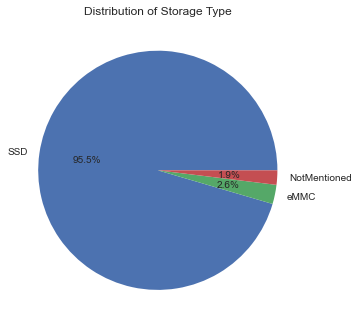

In [51]:
# Pie Chart for the "Storage" Column
storage_counts = laptop['Storage type'].value_counts()
plt.pie(storage_counts, labels=storage_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Storage Type')
plt.show()

<div style="color: #028A0F; font-size: 16px; text-align: left;">
     <h2>Interpretation:</h2>
 This pie chart illustrates the proportions of laptop's Storage types. the most important Storage type is SSD ( 95.5 %) , while a smaller portion is eMMc ( 2.6% )
</div>

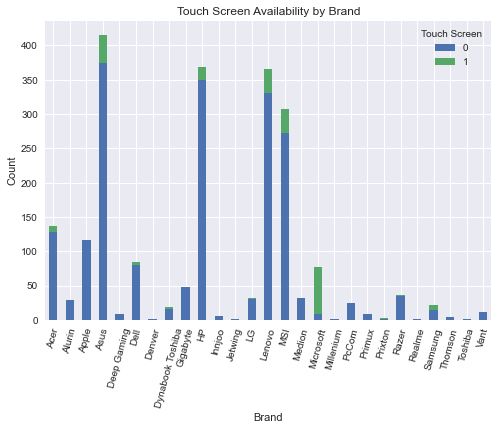

In [52]:
#reshape the data, filling any missing values with 0
touchscreen_counts = laptop.groupby(['Brand', 'Touch screen']).size().unstack(fill_value=0)
touchscreen_counts.plot(kind='bar', stacked=True)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Touch Screen Availability by Brand')
plt.xticks(rotation=75)
plt.legend(title='Touch Screen')
plt.show()

<div style="color: #028A0F; font-size: 16px; text-align: left;">
     <h2>Interpretation:</h2>
 This stacked bar plot is illustrating the availability of touchscreen laptops across various laptop brands in the dataset. Each bar represents a different brand, divided into segments representing the count of laptops with and without touchscreens. The x-axis denotes the laptop brands, while the y-axis indicates the count of laptops ( the colors green and blue visually differentiates between touchscreen and non-touchscreen laptops  
</div>

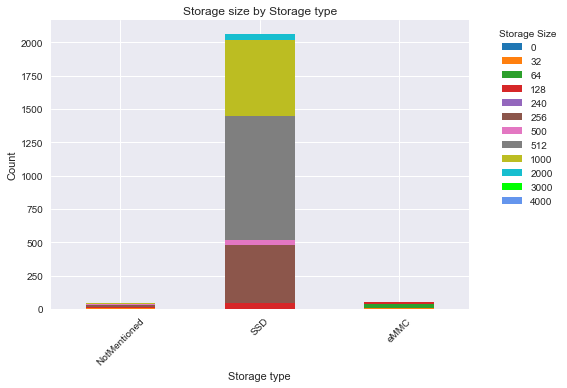

In [53]:
# Reshape the data, filling any missing values with 0
processor_tier_counts = laptop.groupby(['Storage type', 'Storage']).size().unstack(fill_value=0)

# Define a custom color palette with more colors
custom_palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 
                  'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'lime', 'cornflowerblue', 
                  'orchid', 'chocolate', 'slategray', 'gold', 'salmon', 'mediumaquamarine', 
                  'dodgerblue', 'mediumvioletred', 'sandybrown']

# Create the stacked bar plot with the custom color palette
processor_tier_counts.plot(kind='bar', stacked=True, color=custom_palette)

# Add labels and a title
plt.xlabel('Storage type')
plt.ylabel('Count')
plt.title('Storage size by Storage type')
plt.xticks(rotation=45)

# Add legend with unique colors
plt.legend(title='Storage Size', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

<div style="color: #01796F; font-size: 16px; text-align: left;">
     <h2>Interpretation:</h2>
     The stacked bar plot visualizes the distribution of storage sizes across the 2 "storage types" in our laptop dataset. Each bar represents a specific storage type, and within each bar, segments are stacked to represent different storage sizes, The length of each segment reflects the count of laptops with that specific storage size.</br>
=> we see here that the eMMc type ( Embedded MultiMediaCard ) does not have a variety of storage size as the SSD type ( only  ranging from 32GB to 128GB ), SSDs offer a wider range of storage options, including larger capacities (up to 4 TB )
</div>

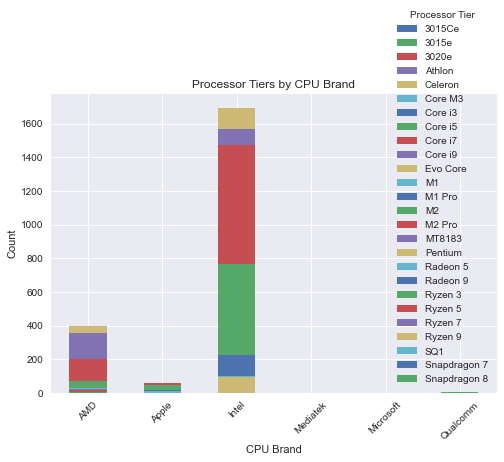

In [54]:
#reshape the data, filling any missing values with 0
#groups the data  by two categorical variables: 'CPU Brand' and 'Processor tier'.
processor_tier_counts = laptop.groupby(['CPU Brand ', 'Processor tier']).size().unstack(fill_value=0)
processor_tier_counts.plot(kind='bar', stacked=True)
plt.xlabel('CPU Brand')
plt.ylabel('Count')
plt.title('Processor Tiers by CPU Brand')
plt.xticks(rotation=45)
plt.legend(title='Processor Tier')
plt.show()

<div style="color: #01796F; font-size: 16px; text-align: left;">
     <h2>Interpretation:</h2>
        This stacked bar plot is used to illustrate the distribution of processor tiers across different CPU brands in the "laptop" dataset. The data is first grouped by both 'CPU Brand' and 'Processor tier', and the size of each group is calculated, this plot visually represents this data, with each bar representing a CPU brand and segments within each bar indicating the count of laptops for each processor tier. The x-axis denotes the CPU brands, while the y-axis represents the count of laptops. 
</div>

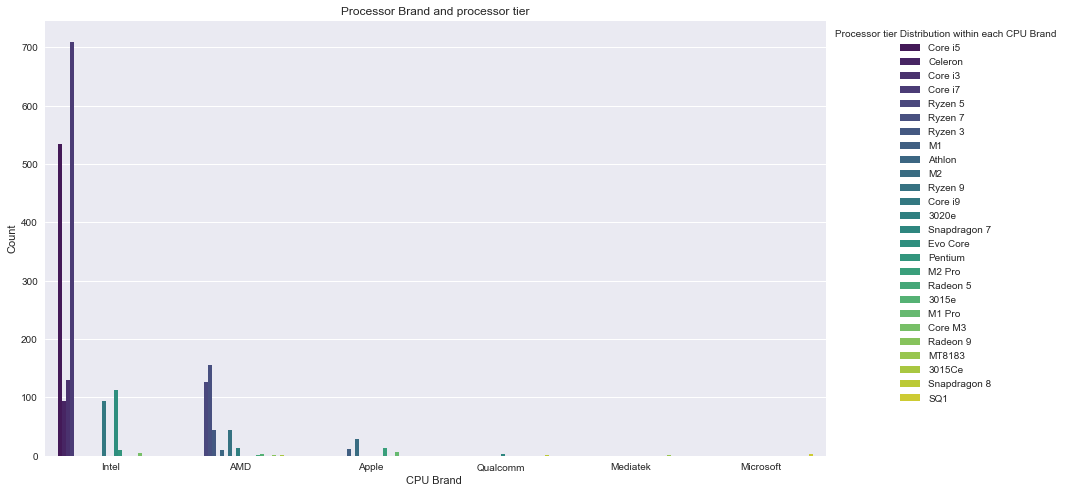

In [55]:
#this graph plots the count of observations for each category of 'CPU Brand'
#the hue parameter is used to differentiate the count based on the 'Processor tier' within each 'CPU Brand'.
plt.figure(figsize=(14, 8))
sns.countplot(x='CPU Brand ', hue='Processor tier', data=laptop, palette='viridis')
plt.title('Processor Brand and processor tier')
plt.xlabel('CPU Brand ')
plt.ylabel('Count')
plt.legend(title='Processor tier Distribution within each CPU Brand', bbox_to_anchor=(1, 1))
plt.show()

<div style="color: #7A4988; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
this Countplot provides a visual representation of the distribution of processor tiers across different CPU brands in the dataset, allowing for easy comparison and analysis of the processor tier composition within each CPU brand
    we see for exemple the most common processor tiers used by CPU brands : the intel Company is most likely into the 'Core i7' of more than 700 laptops and the 'Core i5' ( more than 500 laptops ) , the AMD company is using the 'Ryzen 7' and the 'Ryzen 5' Models
</div>

<div style="color: #A1045A;padding:30px; font-size:33px; text-align:center;">Features Relationship with the Laptop's Price :</div>

In [56]:
#sorting the Laptops based on their prices in TND 
laptop = laptop.sort_values(by='Price_in_TND', ascending=False)
laptop.head()

,Laptop's full Name,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen Size,Touch screen,Price,CPU Brand,Processor tier,GPU Brand,Price_in_TND
1099,MSI Raider GE78HX 13VH-065ES Intel Core i9-139...,New,MSI,Raider,Intel Core i9,32,2000,SSD,RTX 4080,17.0,0,7150.47,Intel,Core i9,RTX,22452.4758
478,MSI Titan GT77 HX 13VI-006ES Intel Core i9-139...,New,MSI,Titan,Intel Core i9,128,2000,SSD,RTX 4090,17.3,0,5999.00,Intel,Core i9,RTX,18836.8600
1202,ASUS ROG Strix SCAR 18 G834JY-93B49PB1 Intel C...,New,Asus,ROG,Intel Core i9,64,2000,SSD,RTX 4090,16.0,0,5758.14,Intel,Core i9,RTX,18080.5596
1245,ASUS ROG Strix Scar 17 G733PY-R97B49PB1 AMD R...,New,Asus,ROG,AMD Radeon 9,32,2000,SSD,RTX 4090,17.3,0,5630.90,AMD,Radeon 9,RTX,17681.0260
1475,HP ZBook Studio G8 Intel Core i7-11850H/16GB/5...,New,HP,Zbook,Intel Core i7,16,512,SSD,RTX A3000,15.6,0,5368.77,Intel,Core i7,RTX,16857.9378


In [57]:
#grouping by the Brand and seing the average price in TND for each Brand
brand_price =laptop.groupby('Brand')['Price_in_TND'].mean().sort_values(ascending=False)
brand_price

Brand
Razer               10254.303092
Millenium            6207.293300
MSI                  6008.236160
LG                   5432.289294
Gigabyte             5333.255329
PcCom                5045.235558
Microsoft            5010.005795
Samsung              5009.905682
Apple                4955.634891
Deep Gaming          4726.885350
Asus                 3985.855394
Dell                 3623.057226
Lenovo               3415.452983
Vant                 3289.010127
Acer                 3144.037307
Dynabook Toshiba     3137.481389
Realme               3136.860000
HP                   2991.253422
Medion               2842.742088
Toshiba              2508.860000
Alurin               1521.962331
Jetwing              1473.507800
Innjoo               1092.369367
Primux               1066.402875
Denver               1036.043000
Thomson               994.940400
Prixton               917.759200
Name: Price_in_TND, dtype: float64

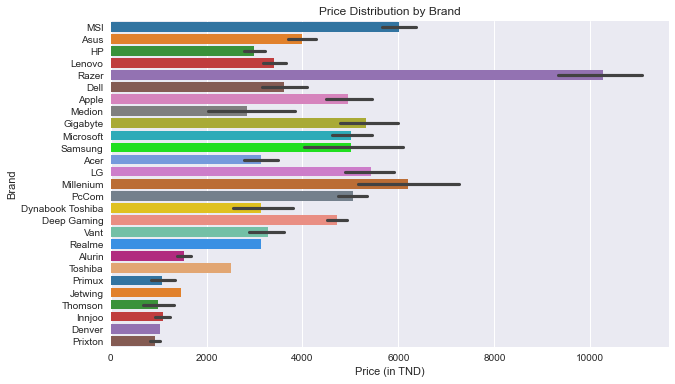

In [58]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot with Seaborn
sns.barplot(x='Price_in_TND', y='Brand', data=laptop, palette=custom_palette)

# Add labels and a title
plt.xlabel('Price (in TND)')
plt.ylabel('Brand')
plt.title('Price Distribution by Brand')

# Show the plot
plt.show()

<div style="color: #1034A6; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
  This graph represents a vision of the Price distribution based on the Brand, it illustrates the distribution of laptop prices across different brands in the dataset. Each bar represents a specific brand, and its length corresponds to the average price of laptops from that brand. The x-axis shows the price of laptops in Tunisian dinars (TND), while the y-axis displays the various laptop brands, This visualization enables easy comparison of average prices between brands</br>
  => the most expensive ones are "Razer" and "Millenium"
</div>

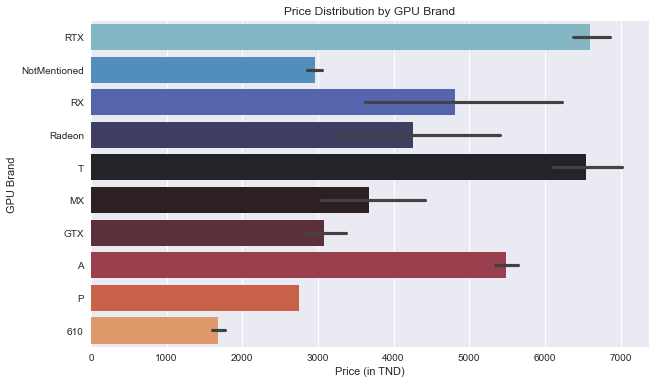

In [59]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot with Seaborn
sns.barplot(x='Price_in_TND', y='GPU Brand', data=laptop, palette="icefire")

# Add labels and a title
plt.xlabel('Price (in TND)')
plt.ylabel('GPU Brand')
plt.title('Price Distribution by GPU Brand')

# Show the plot
plt.show()

<div style="color: #1034A6; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
  This graph represents a vision of the Price distribution based on the Brand of the GPU ( graphical processing Unit), This bar plot enables us to visualize how laptop prices vary across different GPU brands, we can easily discern which GPU brands tend to have higher or lower average prices. </br>
  => RTX and T have the most expensive laptops on average, they both are under the NVIDIA company
</div>

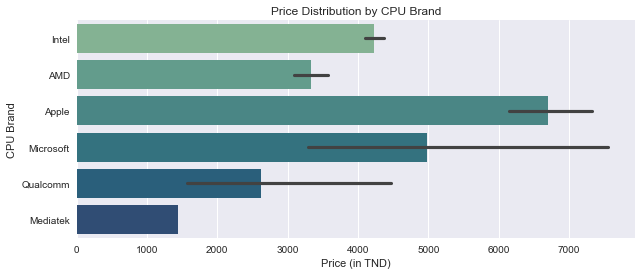

In [60]:
# Set the figure size
plt.figure(figsize=(10, 4))

# Create a bar plot with Seaborn
sns.barplot(x='Price_in_TND', y='CPU Brand ', data=laptop, palette='crest')

# Add labels and a title
plt.xlabel('Price (in TND)')
plt.ylabel('CPU Brand')
plt.title('Price Distribution by CPU Brand')

# Show the plot
plt.show()

<div style="color: #1034A6; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
This graph represents a vision of the Price distribution based on the Brand of the CPU ( central processing Unit), offers insights into how laptop prices vary across different CPU brands.
    </br>
    It facilitates understanding of price disparities among various CPU brands, aiding consumers and analysts in making informed decisions regarding CPU brand preferences and budget considerations.</br>
    => we see that Apple and Microsoft tend to have the most important Prices on Average , followed by intel and AMD .
</div>

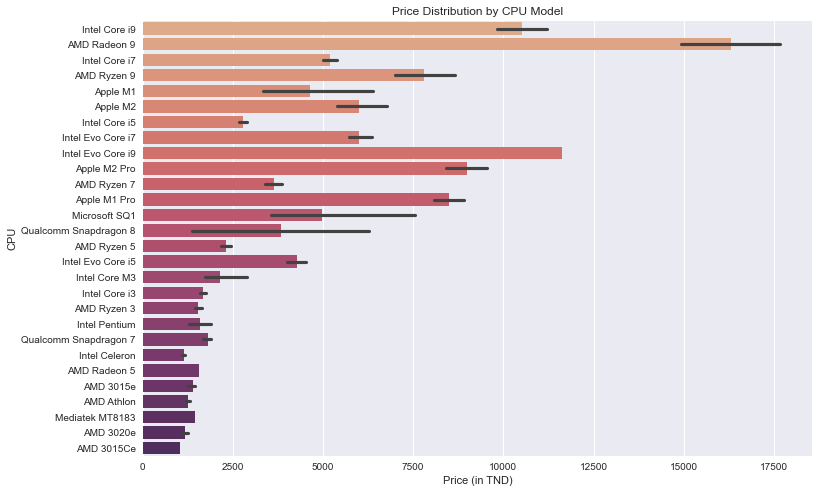

In [61]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar plot with Seaborn
sns.barplot(x='Price_in_TND', y='CPU', data=laptop, palette='flare')

# Add labels and a title
plt.xlabel('Price (in TND)')
plt.ylabel('CPU')
plt.title('Price Distribution by CPU Model')

# Show the plot
plt.show()

<div style="color: #1034A6; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
This bar plot facilitates the understanding of how laptop prices vary across different CPU models. By comparing the widths of the bars, one can discern which CPU models tend to have higher or lower average prices.</br>
=> The "AMD Radeon 9" is the most expensive Model followed by the "Intel Evo Core i9"
</div>

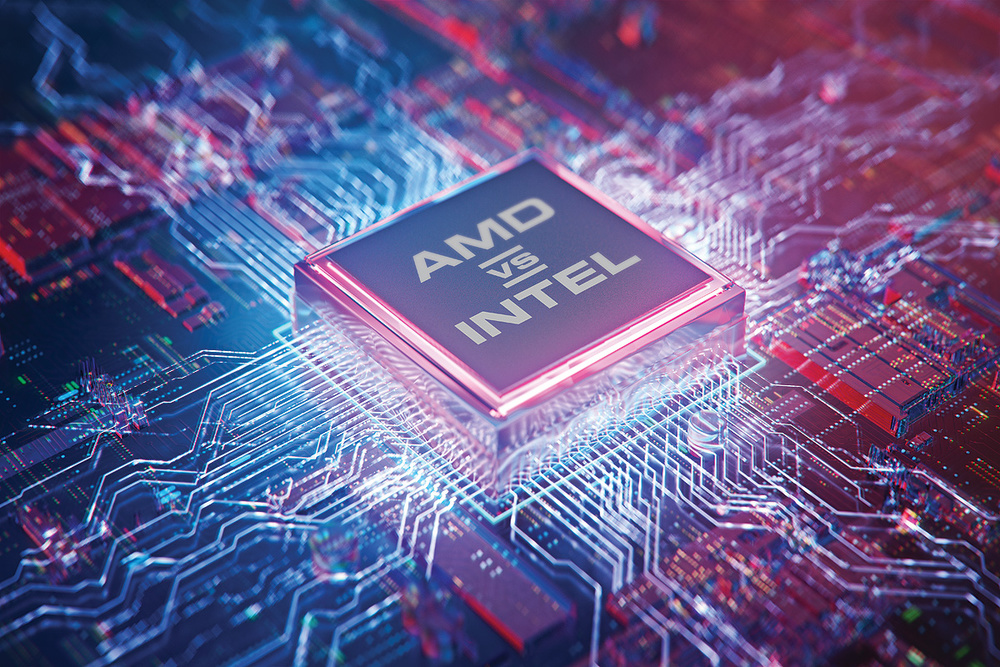

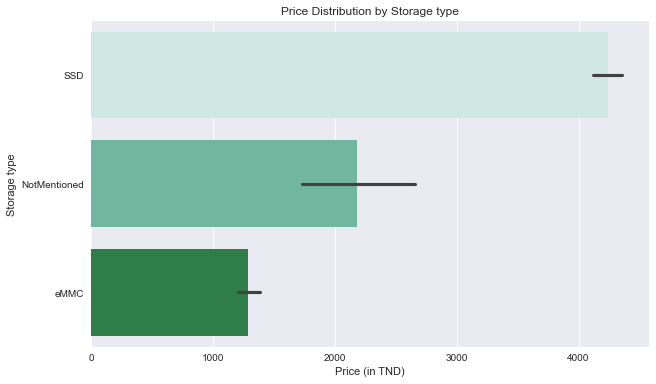

In [62]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot with Seaborn
sns.barplot(x='Price_in_TND', y='Storage type', data=laptop, palette='BuGn')

# Add labels and a title
plt.xlabel('Price (in TND)')
plt.ylabel('Storage type')
plt.title('Price Distribution by Storage type')

# Show the plot
plt.show()

<div style="color: #028A0F; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
This graph represents a vision of the Price distribution based on the Storage type, it allows for a visual comparison of laptop prices across different storage types. By comparing the heights of the bars, one can discern which storage types tend to have higher or lower average prices.</br>
=> in our case we see that the most expensive is the SSD type (Solid-State Drive) : due to its faster read/write Operations than the eMMc type (smaller capacity)
</div>

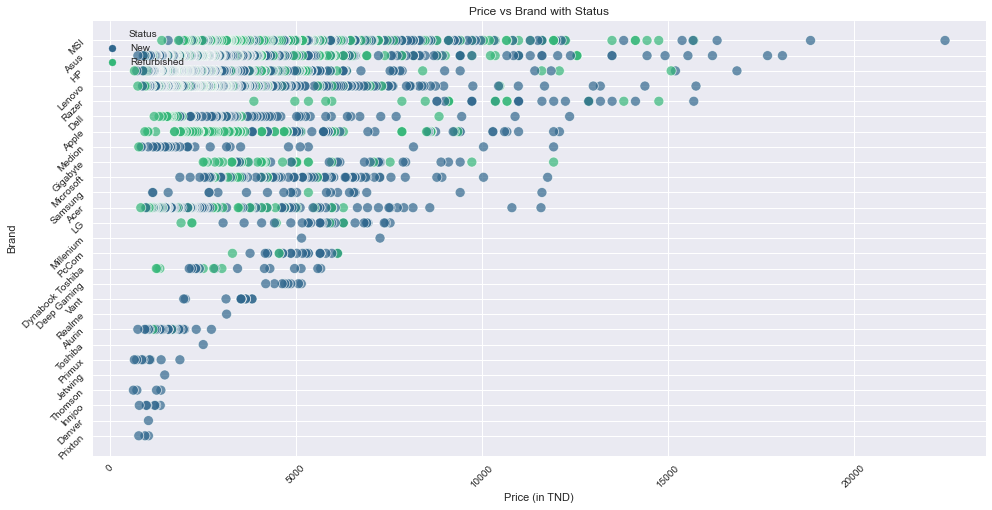

In [63]:
# Set the style to a custom style
plt.style.use('seaborn')
plt.figure(figsize=(16, 8))
# Create a scatter plot with Seaborn
sns.scatterplot(x='Price_in_TND', y='Brand', hue='Status', data=laptop, palette='viridis', s=100, alpha=0.7)

# Add labels and a title
plt.xlabel('Price (in TND)')
plt.ylabel('Brand')
plt.title('Price vs Brand with Status')

# Add a legend with title
plt.legend(title='Status', loc='upper left')

# Customize tick labels
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()



<div style="color: #028A0F; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
The scatter plot shows the relationship between the price of laptops and their Brands, with the variation OF The "status" represented by different colors.
Each point on the plot represents a laptop, with its price on the x-axis and the brand on the y-axis.
The color of each point indicates the Status of the laptop ( New or Refurbished) 
</div>

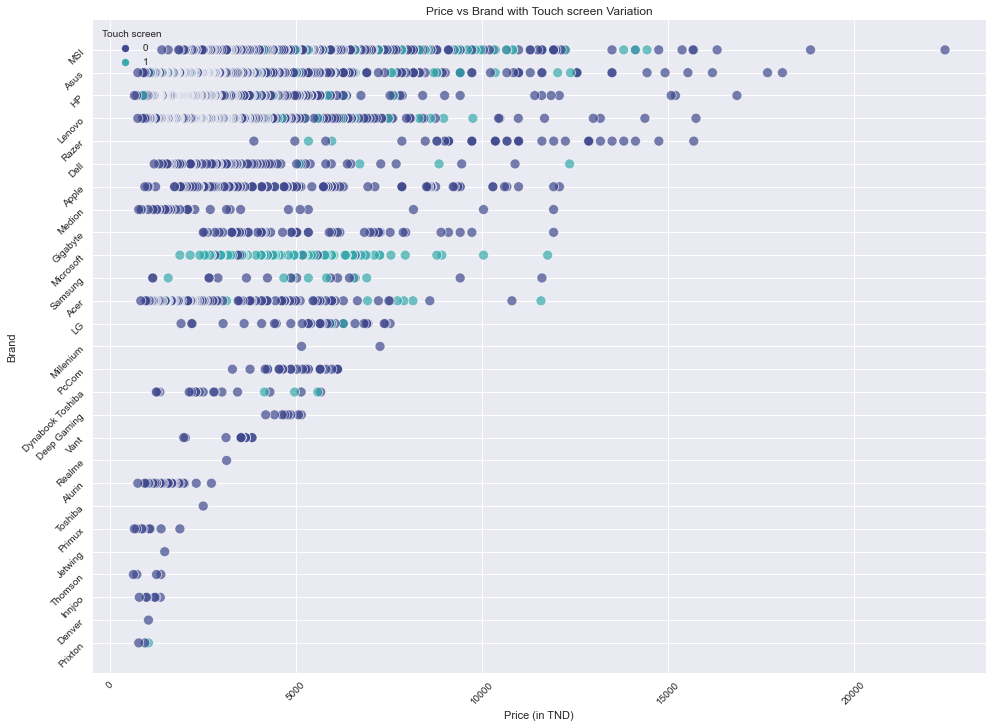

In [64]:
# Set the style to a custom style
plt.style.use('seaborn')
plt.figure(figsize=(16, 12))
# Create a scatter plot with Seaborn
sns.scatterplot(x='Price_in_TND', y='Brand', hue='Touch screen', data=laptop, palette='mako', s=100, alpha=0.7)

# Add labels and a title
plt.xlabel('Price (in TND)')
plt.ylabel('Brand')
plt.title('Price vs Brand with Touch screen Variation')

# Add a legend with title
plt.legend(title='Touch screen', loc='upper left')

# Customize tick labels
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()


<div style="color: #0492C2; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
The scatter plot shows the relationship between the price of laptops and their brands, with the variation OF The "Touch Screen"  represented by different colors.
Each point on the plot represents a laptop, with its price on the x-axis and the brand on the y-axis.
The color of each point indicates whether the Laptop have a "Touch Screen" or not.
</div>

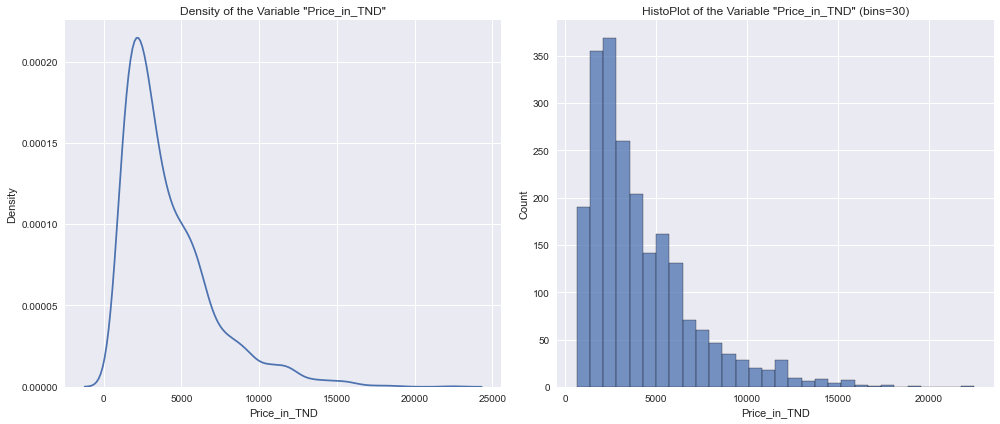

In [65]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the KDE plot on the first subplot : the Density of the "Price_in_TND" Variable
sns.kdeplot(data=laptop, x='Price_in_TND', ax=axes[0])
axes[0].set_xlabel('Price_in_TND')
axes[0].set_ylabel('Density')
axes[0].set_title('Density of the Variable "Price_in_TND"')

# Plot the histogram on the second subplot
sns.histplot(laptop["Price_in_TND"], bins=30, ax=axes[1])
axes[1].set_xlabel('Price_in_TND')
axes[1].set_ylabel('Count')
axes[1].set_title('HistoPlot of the Variable "Price_in_TND" (bins=30)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


<div style="color: #0492C2; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
-The KDE plot provides a smoothed representation of the probability density function of the data. It shows the distribution of prices in Tunisian dinars, with higher peaks indicating regions of higher density and lower peaks indicating regions of lower density. =>Higher density for laptops prices under 5000 TND</br>
-The Histoplot divides the range of price values into bins(30) and displays the frequency or count of observations within each bin. It provides a visual representation of the distribution of prices, showing how many data points fall into each price range. This helps to identify the frequency of occurrence of different price values
</div>

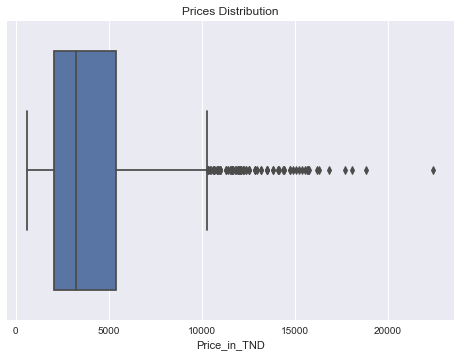

In [66]:
# Visualisation verticale de la boîte à moustache du montant des pourboires
sns.boxplot(x= laptop["Price_in_TND"]).set_title("Prices Distribution");

<div style="color: #1034A6; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
    The box plot displays key statistical measures of the 'Price_in_TND' variable, including the median, quartiles, and potential outliers.</br>
    This Boxplot is showing the distribution of laptops based on their Prices </br>
    The box in the middle of the plot represents the interquartile range (IQR </br>
     Individual data points that fall outside the whiskers are considered outliers and are plotted individually as points beyond the whiskers.</br>
    => we can see the outliers here : Laptops that costs more than 15000 and 20000
</div>

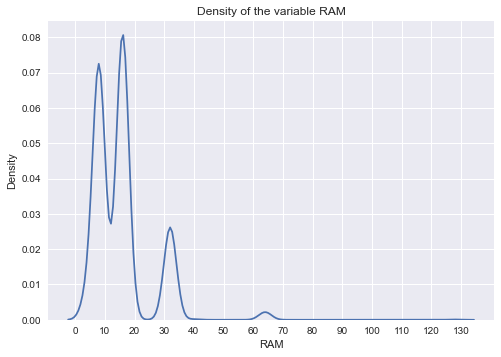

In [67]:
# Density of the RAM Variable
sns.kdeplot(data=laptop, x='RAM')
plt.xlabel('RAM')
plt.ylabel('Density')
plt.title('Density of the variable RAM')
# Set the ticks of the x-axis to go by 10 each time
plt.xticks(np.arange(0, laptop['RAM'].max() + 10, 10))
plt.show()


<div style="color: #0492C2; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
The KDE plot generates a visualization of the density of the 'RAM' variable in the laptop dataset. This plot represents the distribution of RAM values across the dataset.= > higher density for the 16RAM, 8 RAM and 24 RAM laptops .
</div>

C:\Users\farah math\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\farah math\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


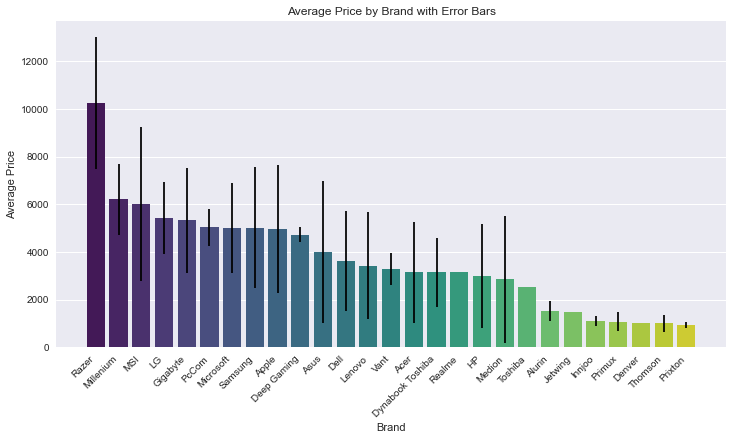

In [68]:
brand_stats = laptop.groupby('Brand')['Price_in_TND'].agg(['mean', 'std']).sort_values(by='mean', ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=brand_stats.index, y='mean', data=brand_stats, palette='viridis')
ax.errorbar(x=brand_stats.index, y=brand_stats['mean'], yerr=brand_stats['std'], fmt='none', color='black', capsize=5)
plt.title('Average Price by Brand with Error Bars')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()

<div style="color: #1034A6; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
   This graph visualizes the average price of laptops by brand, accompanied by error bars indicating the standard deviation for each brand. The data is aggregated by brand, with the mean and standard deviation calculated for the 'Price_in_TND' variable. The brands are sorted based on their average price in descending order.</br>
   => Each bar represents the average price of laptops for a specific brand, with error bars extending from each bar indicating the range of prices that fall within one standard deviation of the mean. 
</div>


C:\Users\farah math\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\farah math\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


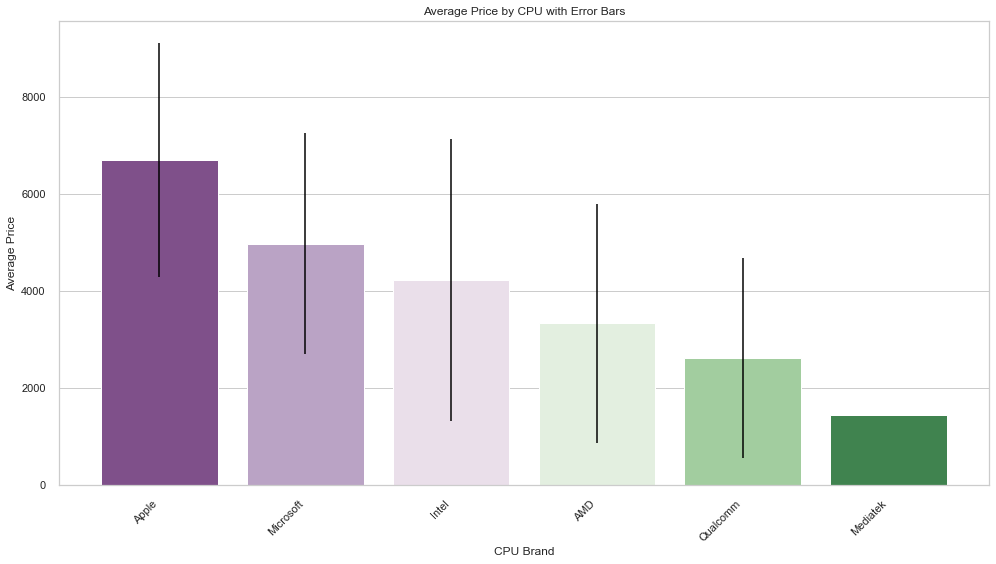

In [69]:
sns.set(style="whitegrid")
brand_stats = laptop.groupby('CPU Brand ')['Price_in_TND'].agg(['mean', 'std']).sort_values(by='mean', ascending=False)
sns.color_palette('viridis', n_colors=len(brand_stats))
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=brand_stats.index, y='mean', data=brand_stats, palette='PRGn')
ax.errorbar(x=brand_stats.index, y=brand_stats['mean'], yerr=brand_stats['std'], fmt='none', color='black', capsize=5)
plt.title('Average Price by CPU with Error Bars')
plt.xlabel('CPU Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

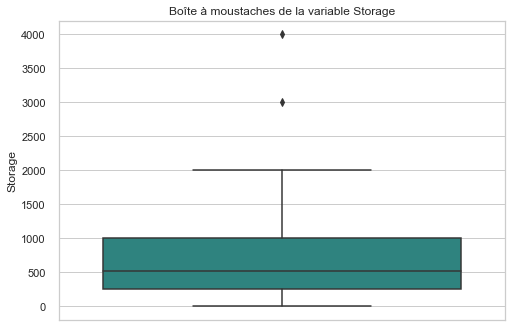

In [70]:
# Boîte à moustache/ Box Plot de la Variable "Storage"

sns.boxplot(data=laptop, y='Storage', palette="viridis")
plt.ylabel('Storage')
plt.title('Boîte à moustaches de la variable Storage')
plt.show()

In [103]:
from scipy import stats
#finding outliers function
def find_outliers(data, variable_name):
    
    iqr = stats.iqr(data[variable_name])
    lower = np.quantile(data[variable_name], 0.25)  - 1.5 * iqr
    upper = np.quantile(data[variable_name], 0.75)  + 1.5 * iqr
    return data[(data[variable_name] < lower) | (data[variable_name] > upper)]

find_outliers(data = laptop, variable_name = 'Storage')

,Laptop's full Name,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen Size,Touch screen,Price,CPU Brand,Processor tier,GPU Brand,Price_in_TND
1691,ASUS ROG Zephyrus Duo 16 GX650RX-LO162W AMD Ry...,Refurbished,Asus,ROG,AMD Ryzen 9,64,4000,SSD,RTX 3080,16.0,0,3999.00,AMD,Ryzen 9,RTX,12556.8600
1790,Asus ROG Zephyrus S17 GX703HS-KF015T Intel Cor...,Refurbished,Asus,ROG,Intel Core i9,32,3000,SSD,RTX 3080,17.3,0,3499.01,Intel,Core i9,RTX,10986.8914


<div style="color: #1034A6; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
    The box plot displays key statistical measures of the 'Storage' variable, including the median, quartiles, and potential outliers.</br>
    This Boxplot is showing the distribution of laptops based on the Storage Size. </br>
    The box in the middle of the plot represents the interquartile range (IQR)
    The line inside the box represents the median value of the 'Storage' variable.</br>
     Individual data points that fall outside the whiskers are considered outliers and are plotted individually as points beyond the whiskers.</br>
    => we can see the outliers here : Laptops having 4TB and 3 TB of storage 
</div>

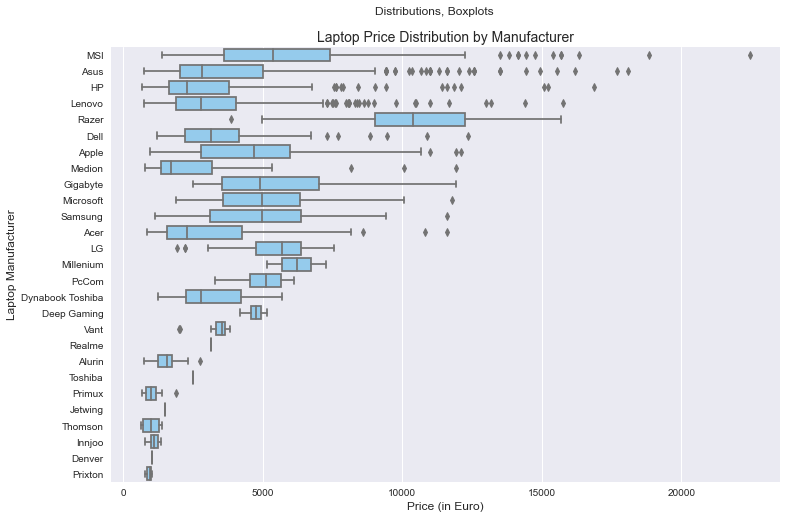

,Laptop's full Name,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen Size,Touch screen,Price,CPU Brand,Processor tier,GPU Brand,Price_in_TND
1099,MSI Raider GE78HX 13VH-065ES Intel Core i9-139...,New,MSI,Raider,Intel Core i9,32,2000,SSD,RTX 4080,17.0,0,7150.47,Intel,Core i9,RTX,22452.4758
478,MSI Titan GT77 HX 13VI-006ES Intel Core i9-139...,New,MSI,Titan,Intel Core i9,128,2000,SSD,RTX 4090,17.3,0,5999.00,Intel,Core i9,RTX,18836.8600
1202,ASUS ROG Strix SCAR 18 G834JY-93B49PB1 Intel C...,New,Asus,ROG,Intel Core i9,64,2000,SSD,RTX 4090,16.0,0,5758.14,Intel,Core i9,RTX,18080.5596
1245,ASUS ROG Strix Scar 17 G733PY-R97B49PB1 AMD R...,New,Asus,ROG,AMD Radeon 9,32,2000,SSD,RTX 4090,17.3,0,5630.90,AMD,Radeon 9,RTX,17681.0260
1475,HP ZBook Studio G8 Intel Core i7-11850H/16GB/5...,New,HP,Zbook,Intel Core i7,16,512,SSD,RTX A3000,15.6,0,5368.77,Intel,Core i7,RTX,16857.9378


In [108]:
# Increase figure size for clarity
plt.figure(figsize=(12, 8))

# Assuming you already have the 'laptop' DataFrame and necessary imports

# Create boxplot
sns.boxplot(x=laptop['Price_in_TND'], y=laptop["Brand"], color="lightskyblue", width=0.8)

# Set labels and titles
plt.xlabel('Price (in Euro)', fontsize=12)
plt.ylabel('Laptop Manufacturer', fontsize=12)
plt.title('Laptop Price Distribution by Manufacturer', fontsize=14)
plt.suptitle('Distributions, Boxplots', y=0.95, fontsize=12)  # Adjust the position of the subtitle

# Increase font size for clarity
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
#showing prices in TND outliers 
outliers = find_outliers(data = laptop, variable_name = 'Price_in_TND')
outliers.head()

<div style="color: #1034A6; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
    We start with manufacturers - out of over 1,300 laptops, 19 products can be distinguished, the most popular of which are Dell and Lenovo (297 devices each). Razer equipment has the highest median price - almost 3,000 euros, but you have to remember about a small sample of laptops from this company (only 7). Chuwi, Vero and Medicom have the cheapest devices on their offer. Distribution of the sprinkler prices are regular for most brands, but some of them have unusual values due to the high price (premium products compared to others), in Lenovo or HP for example. The company that produces the equipment seems to be a variable that can vary the price, not only after looking at the chart, but also knowing the strength of brand and recognition.
</div>

<AxesSubplot:>

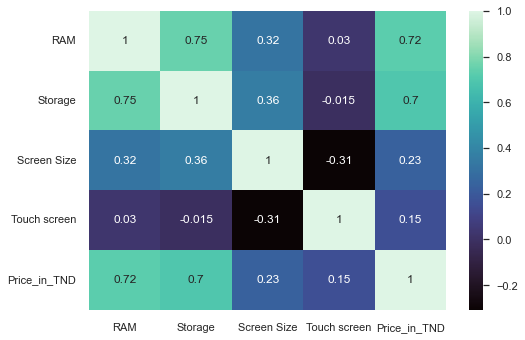

In [74]:
#heatmap creation to see the variables correlations 
#dropping the "Price" column to avoid conflict
laptop1 = laptop.drop(columns=['Price'])
sns.heatmap(laptop1.corr(), cmap='mako', annot=True)


<div style="color: #088F8F; font-size: 16px; text-align: left;">
    <h2>Interpretation for the HeatMap</h2>
   The heatmap visually represents the correlations between different numerical variables in the 'laptop' dataset.
Each cell in the heatmap corresponds to the correlation coefficient between two variables. The color intensity of each cell indicates the strength and direction of the correlation: positive correlations are represented by lighter colors (closer to light blue), while negative correlations are represented by darker colors (closer to black) + The annotation on each cell provides the exact numerical value of the correlation coefficient.</br>
    + correlation between the "Storage" and the "RAM"</br>
    + correlation between the "Price" and the "RAM" an "Storage"
</div>

<div style="color: #088F8F; font-size: 16px; text-align: left;">
    <h2>Interpretation for The Lineplots:</h2>
   we will be creating  a line plot for each numerical column
generating a series of line plots, each showing the relationship between one of the numerical columns in the DataFrame laptop and the 'Price_in_TND' column. These plots help visualize how each numerical feature correlates with the price of laptops.
</div>

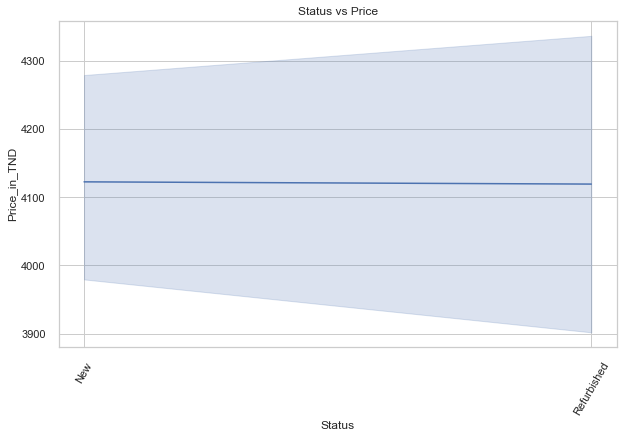

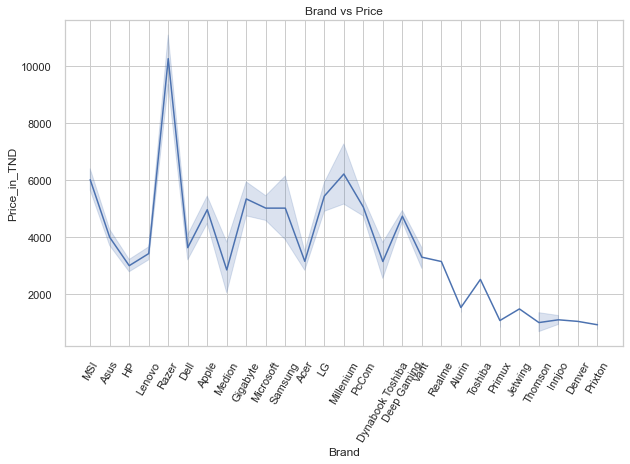

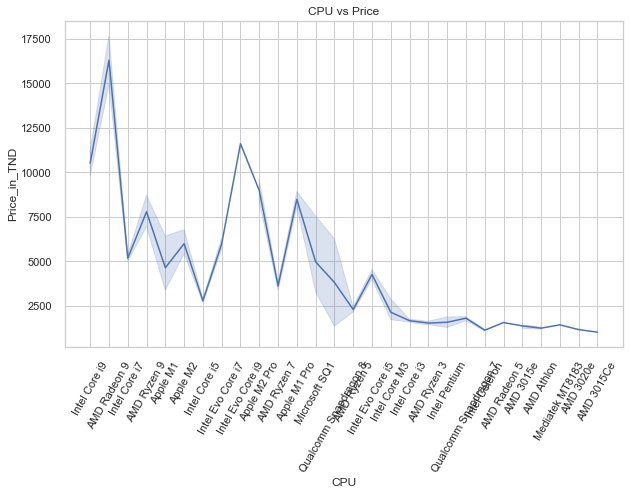

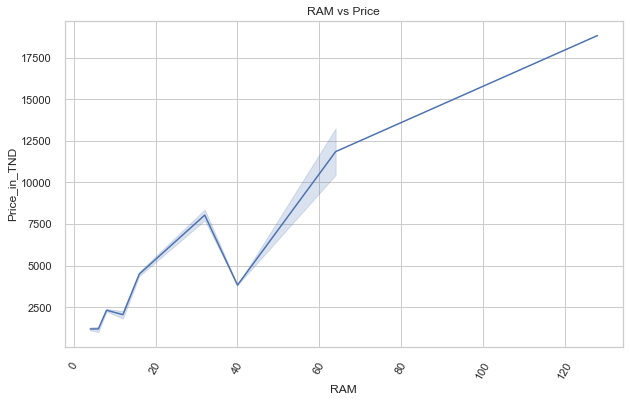

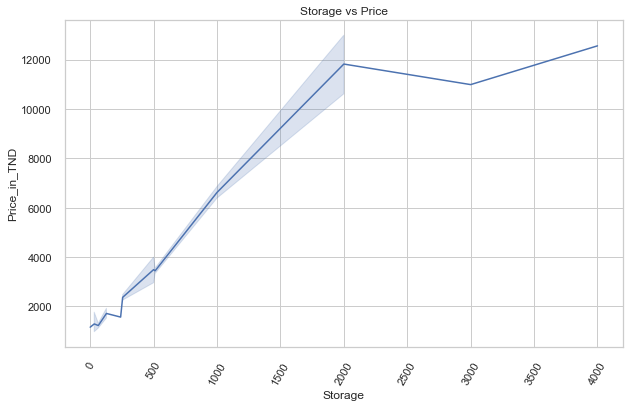

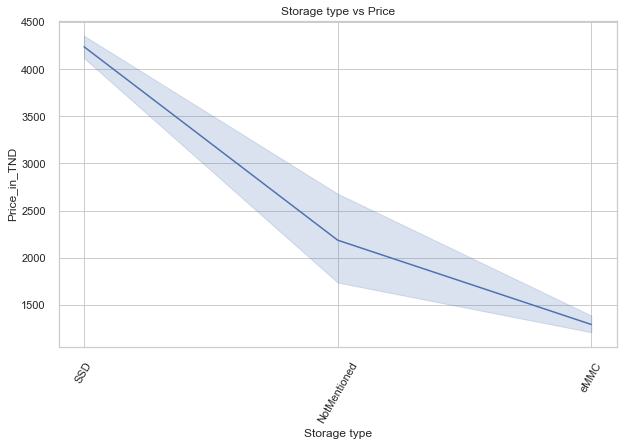

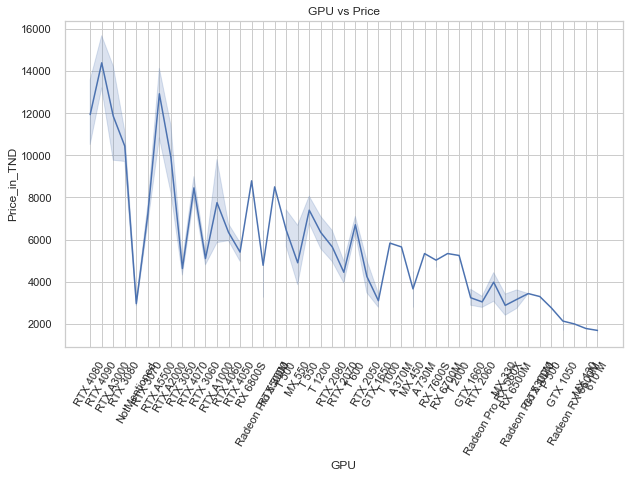

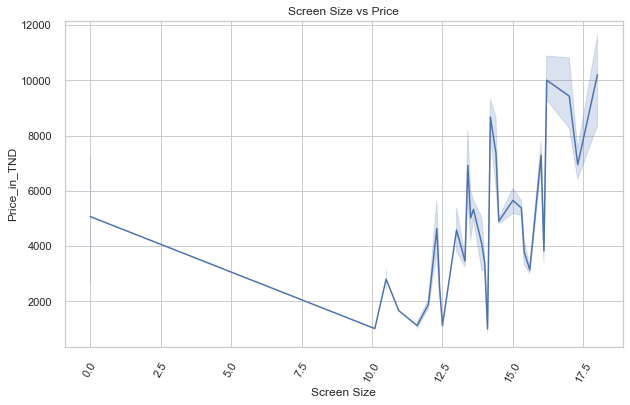

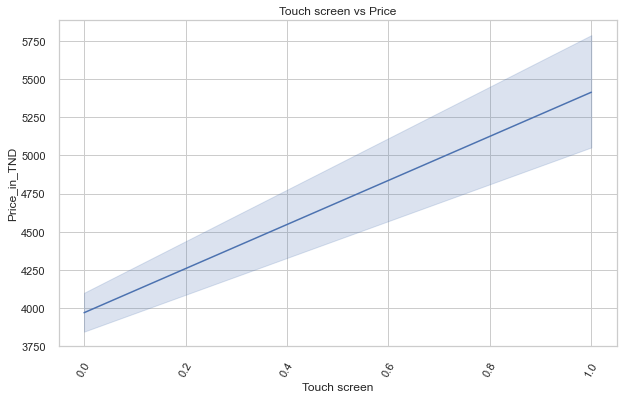

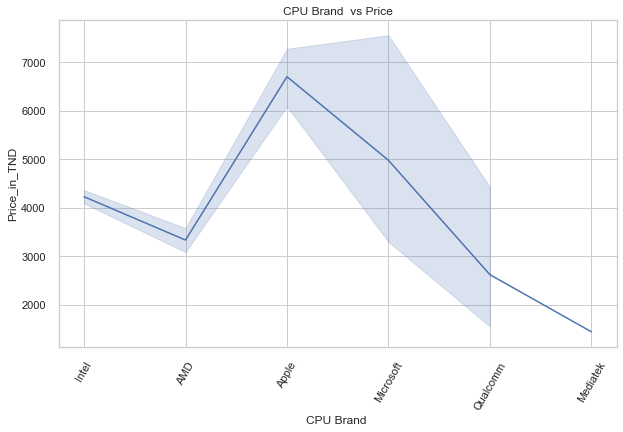

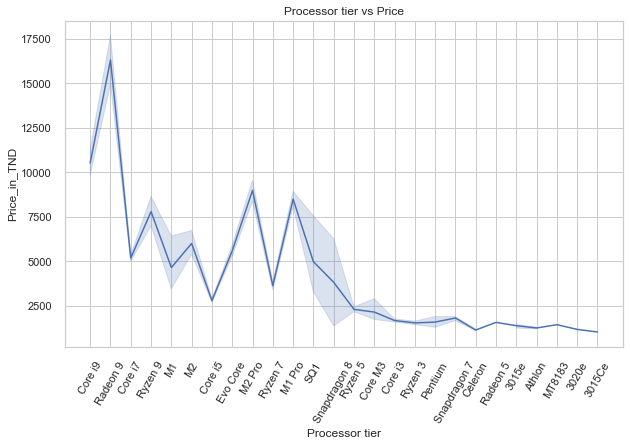

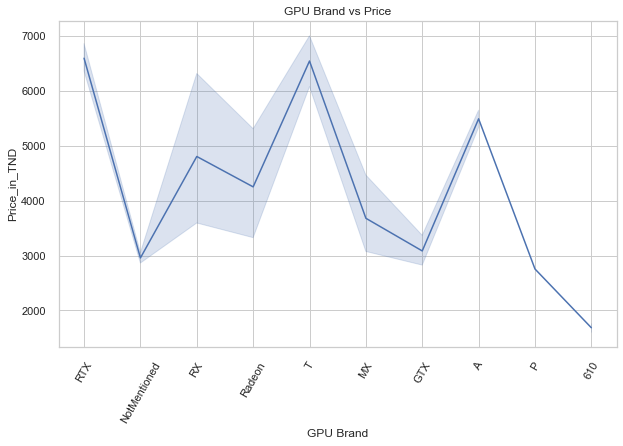

In [75]:
lap = laptop.drop(columns=["Laptop's full Name","Model","Price_in_TND"])
for col in lap.columns:
    if 'Price' not in col :
        fig, ax = plt.subplots(figsize=(10, 6))
        plt.title(f'{col} vs Price')
        plt.xticks(rotation=60)
        sns.lineplot(data=lap, x=col, y=laptop['Price_in_TND'])

 <div style="color: #9867C5;padding:30px; font-size:32px; text-align:center;">
the 5 most Expensive Laptops based on specific Features</div>


Text(0.5, 1.0, 'Top 5 most expensive Laptop Brands')

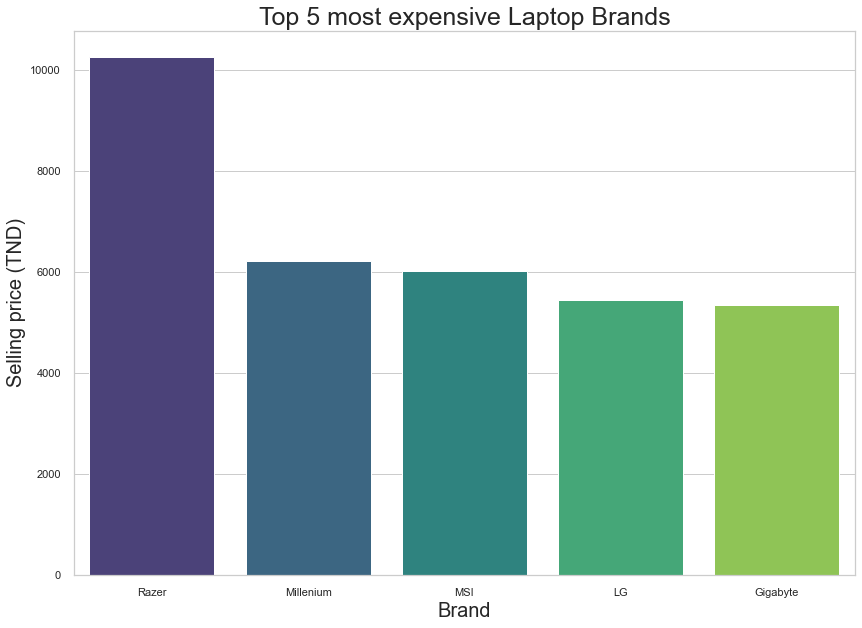

In [77]:
#to display to Top 5 expensive laptops Brands
fig, ax = plt.subplots(figsize=(14, 10))
ax = sns.barplot(palette="viridis", x=laptop.groupby('Brand').mean()['Price_in_TND'].sort_values(ascending=False)[:5].index, y=laptop.groupby('Brand').mean()['Price_in_TND'].sort_values(ascending=False)[:5].values)
ax.set_xlabel('Brand', fontsize=20)
ax.set_ylabel('Selling price (TND)', fontsize=20)
ax.set_title('Top 5 most expensive Laptop Brands', fontsize=25)

 <div style="color: #9867C5;padding:20px; font-size:20px; text-align:left;">
=>We see that the most expensive brand is "Razer" of more then 10000 TND</div>


Text(0.5, 1.0, 'Top 5 most expensive Laptop Models')

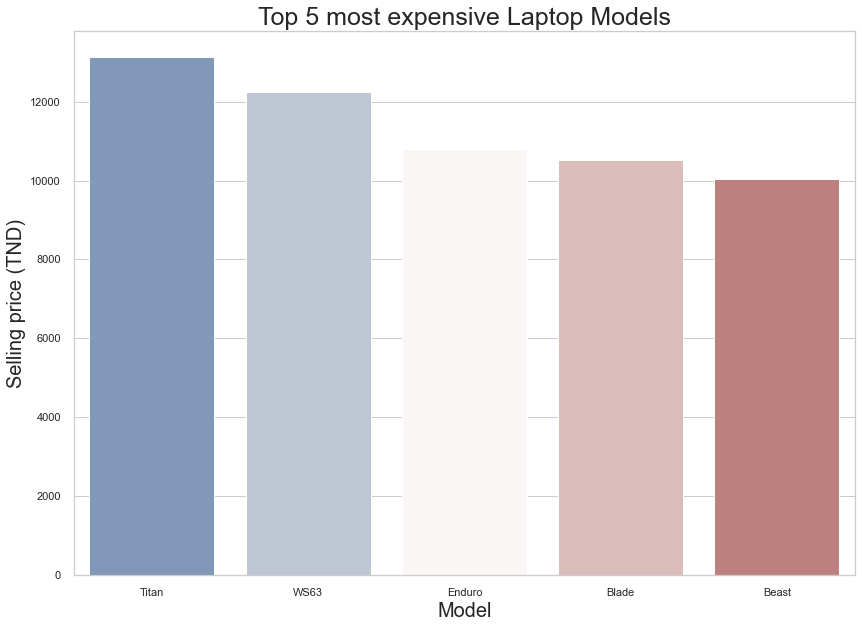

In [78]:
#to display to Top 5 expensive laptops Models
fig, ax = plt.subplots(figsize=(14, 10))
ax = sns.barplot(palette="vlag",x=laptop.groupby('Model').mean()['Price_in_TND'].sort_values(ascending=False)[:5].index, y=laptop.groupby('Model').mean()['Price_in_TND'].sort_values(ascending=False)[:5].values)
ax.set_xlabel('Model', fontsize=20)
ax.set_ylabel('Selling price (TND)', fontsize=20)
ax.set_title("Top 5 most expensive Laptop Models", fontsize=25)

 <div style="color: #9867C5;padding:20px; font-size:20px; text-align:left;">
=>We see that the most expensive Model is "Titan" of more then 12000 TND cost</div>


Text(0.5, 1.0, 'Top 5 most expensive Laptop CPU s')

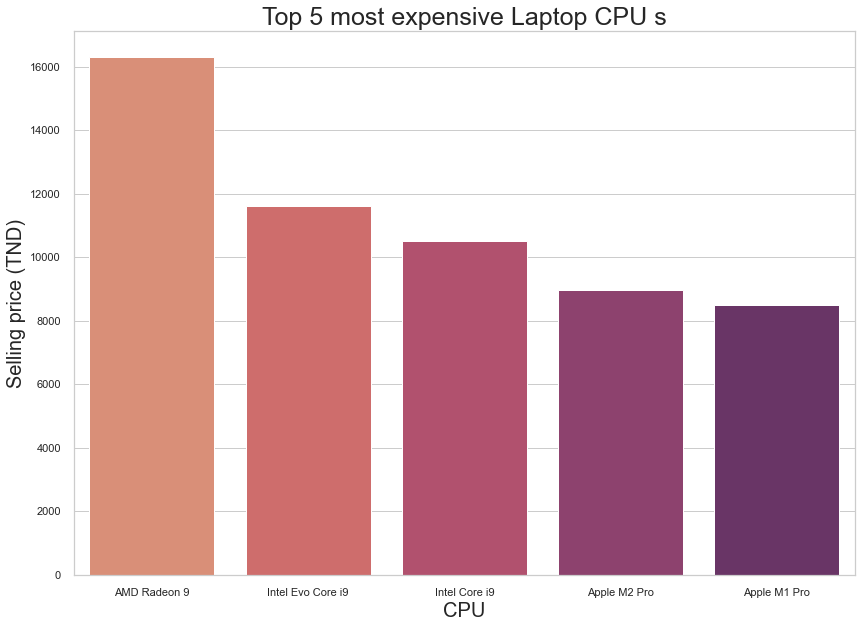

In [79]:
#to display to Top 5 expensive laptops CPU Models
fig, ax = plt.subplots(figsize=(14, 10))
ax = sns.barplot(palette="flare",x=laptop.groupby('CPU').mean()['Price_in_TND'].sort_values(ascending=False)[:5].index, y=laptop.groupby('CPU').mean()['Price_in_TND'].sort_values(ascending=False)[:5].values)
ax.set_xlabel('CPU', fontsize=20)
ax.set_ylabel('Selling price (TND)', fontsize=20)
ax.set_title("Top 5 most expensive Laptop CPU s", fontsize=25)

 <div style="color: #9867C5;padding:20px; font-size:20px; text-align:left;">
=>We see that the most expensive CPU Model is the "AMD Radeon 9" of more then 16000 TND cost</div>


Text(0.5, 1.0, 'Top 5 most expensive Laptop GPU s')

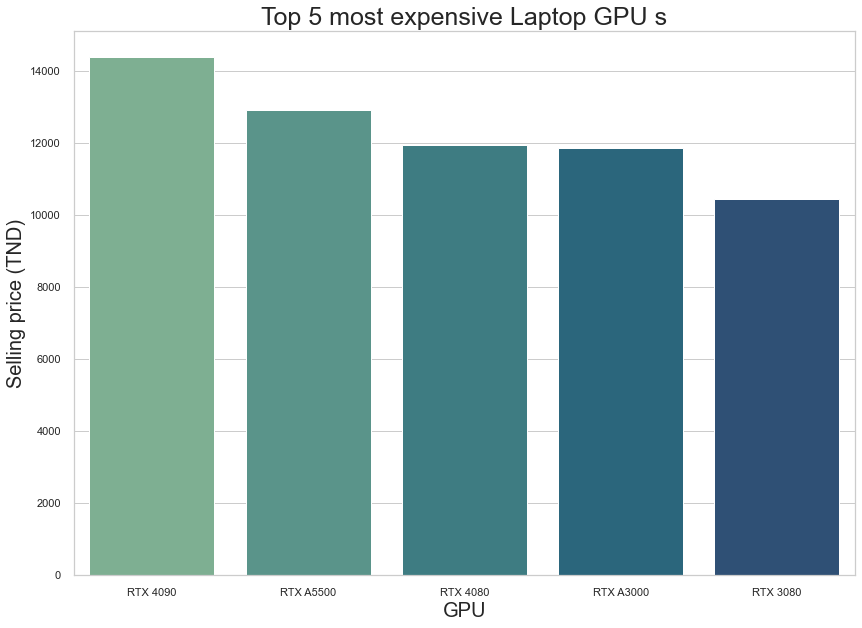

In [80]:
#to display to Top 5 expensive laptops GPUs
fig, ax = plt.subplots(figsize=(14, 10))
ax = sns.barplot(palette="crest",x=laptop.groupby('GPU').mean()['Price_in_TND'].sort_values(ascending=False)[:5].index, y=laptop.groupby('GPU').mean()['Price_in_TND'].sort_values(ascending=False)[:5].values)
ax.set_xlabel('GPU', fontsize=20)
ax.set_ylabel('Selling price (TND)', fontsize=20)
ax.set_title("Top 5 most expensive Laptop GPU s", fontsize=25)

 <div style="color: #9867C5;padding:20px; font-size:20px; text-align:left;">
=>We see that the most expensive GPU Model is The "RTX 4090" of more then 14000 TND cost
</div>

<div style="padding:30px; color: #9867C5; font-size:40px; text-align:center;"> 
Machine Learning Models </div>

In [82]:
laptop.dtypes

Laptop's full Name     object
Status                 object
Brand                  object
Model                  object
CPU                    object
RAM                     int64
Storage                 int64
Storage type           object
GPU                    object
Screen Size           float64
Touch screen            int64
Price                 float64
CPU Brand              object
Processor tier         object
GPU Brand              object
Price_in_TND          float64
dtype: object

 <div style="color: #9867C5;padding:10px; font-size:20px; text-align:left;">
Using the "Dummy variables" for categorical Columns:<br>
It converts categorical variables into a series of zeros and ones, making them easier to quantify and compare.
</div>

In [156]:
#removing some unneeded columns 
data = laptop.drop(columns = ["Laptop's full Name",'Price','Storage type','Processor tier','GPU Brand','CPU Brand '])
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 1099 to 668
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Status        2160 non-null   object 
 1   Brand         2160 non-null   object 
 2   Model         2160 non-null   object 
 3   CPU           2160 non-null   object 
 4   RAM           2160 non-null   int64  
 5   Storage       2160 non-null   int64  
 6   GPU           2160 non-null   object 
 7   Screen Size   2160 non-null   float64
 8   Touch screen  2160 non-null   int64  
 9   Price_in_TND  2160 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 250.2+ KB


In [157]:

#creating dummy variables for categorical columns
dummy_data = pd.get_dummies(data, columns = ['Brand', 'Model', 'CPU', 'GPU', 'Status'])
# merging the original data DataFrame with the dummy_data DataFrame based on their indices
data = data.merge(dummy_data, left_index = False, right_index = False)
#removing the original categorical columns for which dummy variables were created=> to avoid redundancy
data = data.drop(columns = ['Brand', 'Model', 'CPU', 'GPU', 'Status'])
print("Shapes of model database: ", data.shape)
data.head()

Shapes of model database:  (3244, 228)


,RAM,Storage,Screen Size,Touch screen,Price_in_TND,Brand_Acer,Brand_Alurin,Brand_Apple,Brand_Asus,Brand_Deep Gaming,...,GPU_Radeon Pro RX 560X,GPU_Radeon RX 6600M,GPU_T 1000,GPU_T 1200,GPU_T 2000,GPU_T 500,GPU_T 550,GPU_T 600,Status_New,Status_Refurbished
0,32,2000,17.0,0,22452.4758,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,128,2000,17.3,0,18836.8600,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,64,2000,16.0,0,18080.5596,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,32,2000,17.3,0,17681.0260,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,16,512,15.6,0,16857.9378,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


 <div style="color: #9867C5;padding:10px; font-size:20px; text-align:left;">
Splitting the dataset into x and y
</div>

In [182]:
#X will be representing the features
X = data.drop(columns = ['Price_in_TND'])
#y will be represnting our target : what we want to predict => the price here ( in TND )
Y = data['Price_in_TND']
#spliting the data into training and testing sets using the train_test_split function from the "sklearn.model_selection" module
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)
# printing the first 5 rows of the feature matrix X t
X.head()

,RAM,Storage,Screen Size,Touch screen,Brand_Acer,Brand_Alurin,Brand_Apple,Brand_Asus,Brand_Deep Gaming,Brand_Dell,...,GPU_Radeon Pro RX 560X,GPU_Radeon RX 6600M,GPU_T 1000,GPU_T 1200,GPU_T 2000,GPU_T 500,GPU_T 550,GPU_T 600,Status_New,Status_Refurbished
0,32,2000,17.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,128,2000,17.3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,64,2000,16.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,32,2000,17.3,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,16,512,15.6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


 <div style="color: #9867C5;padding:10px; font-size:20px; text-align:left;">
Standardizing the data Using the StandardScaler: </br>
  -it standardizes the features by centering them around zero and scaling them to have a standard deviation of 1.
</div>

 <div style="color: #1560BD;padding:10px; font-size:20px; text-align:left;">
 By scaling the features, you ensure that all features contribute equally to the model's learning process
</div>

In [183]:
#creating an instance of the "StandardScaler" class 
scaler = StandardScaler()
#fitting the scaler to the training data: it computes the mean and standard deviation of each feature
scaler.fit(X_train)
#transforming/scaling the training and testing data 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

 <div style="color: #1560BD;padding:10px; font-size:20px; text-align:left;">
 => By scaling the features, you ensure that all features contribute equally to the model's learning process
</div>

 <div style="color: #9867C5;padding:10px; font-size:20px; text-align:left;">
Models Creation : </br>LinearRegression + DecisionTreeRegressor
</div>

In [184]:
#creating an instance of the LinearRegression class from the scikit-learn library
reg=LinearRegression()
#fitting (training) the linear regression model reg on the training data (X_train and y_train).
reg.fit(X_train, y_train)
# generating predictions on the testing data (X_test) using the trained linear regression model (reg).
y_pred = reg.predict(X_test)
#This line calculates the coefficient of determination (R^2) between the true target values (y_test) and the predicted values (y_pred) 
r2_linear=r2_score(y_test, y_pred)
#This line calculates the mean squared error (MSE) between the true target values (y_test) and the predicted values (y_pred)
mse_linear = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error:", mse_linear)
print("Linear Regression R^2 Score:", r2_linear)

Linear Regression Mean Squared Error: 1.9179688077288108e+32
Linear Regression R^2 Score: -2.657641111329296e+25


In [185]:
#creates an instance of the DecisionTreeRegressor class from the scikit-learn library.
dt = DecisionTreeRegressor(random_state=1)
#fitting (training) the Decision Tree Regressor model dt on the training data (X_train and y_train
dt.fit(X_train, y_train)
#generating predictions on the testing data
dt_pred = dt.predict(X_test)
#calculating the coefficient of determination (R^2) 
r2_decision = r2_score(y_test, y_pred)
#calculating the mean squared error (MSE) between the true target values (y_test) and the predicted values (dt_pred) obtained from the model.
mse_decision = mean_squared_error(y_test, dt_pred)
print("Decision Tree Regressor Mean Squared Error:", mse_decision)
print("Decision Tree Regressor R^2 Score:", r2_decision)

Decision Tree Regressor Mean Squared Error: 1521995.190288963
Decision Tree Regressor R^2 Score: -2.657641111329296e+25


In [123]:
print("Making predictions for the following 5 laptops:")
print(X.head())
print("Predictions using Linear Regression:")
print(reg.predict(X_test[:5]))
print("Predictions using Decision Tree Regressor:")
print(dt.predict(X_test[:5]))

Making predictions for the following 5 laptops:
   RAM  Storage  Screen Size  Touch screen  Brand_Acer  Brand_Alurin  \
0   32     2000         17.0             0           0             0   
1  128     2000         17.3             0           0             0   
2   64     2000         16.0             0           0             0   
3   32     2000         17.3             0           0             0   
4   16      512         15.6             0           0             0   

   Brand_Apple  Brand_Asus  Brand_Deep Gaming  Brand_Dell  ...  GPU Brand_610  \
0            0           0                  0           0  ...              0   
1            0           0                  0           0  ...              0   
2            0           1                  0           0  ...              0   
3            0           1                  0           0  ...              0   
4            0           0                  0           0  ...              0   

   GPU Brand_A  GPU Brand_GTX  G

In [168]:
print("Linear Regression MSE:" + Fore.CYAN + str(mse_linear) + Style.RESET_ALL)
print("Decision Tree Regression MSE:" + Fore.RED + str(mse_decision) + Style.RESET_ALL)

Linear Regression MSE:2.541627296018129e+31
Decision Tree Regression MSE:1577246.5369838178


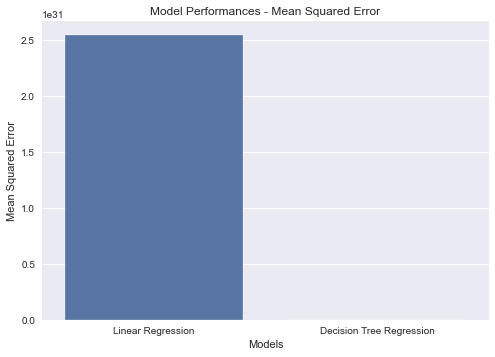

In [169]:
# Create a bar graph for model performances
models = ['Linear Regression', 'Decision Tree Regression']
mse_scores = [mse_linear, mse_decision]

sns.barplot(x=models, y=mse_scores)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Model Performances - Mean Squared Error')

plt.show()

 <div style="color: #9867C5;padding:10px; font-size:31px; text-align:center;">
Clustering:
</div>

In [189]:
#Initializes an empty list named loss to store the loss (inertia) values
#to determine the optimal number of clusters 
loss=[]
OMP_NUM_THREADS=11
#This loop iterates over a range of numbers of clusters
for k in range(1,OMP_NUM_THREADS):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit_predict(X)
    loss.append(kmeans.inertia_)

C:\Users\farah math\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(


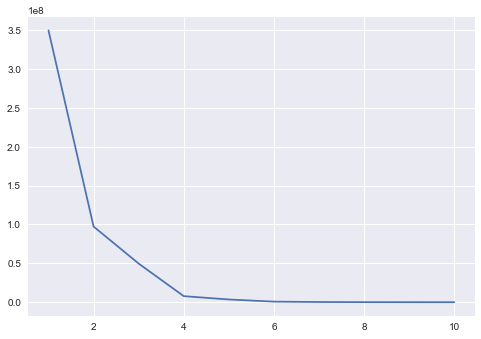

In [166]:
#plots the loss (inertia) values against the number of clusters
plt.plot(range(1,OMP_NUM_THREADS),loss)

=> we should be looking for the "elbow" point in the plot = 5

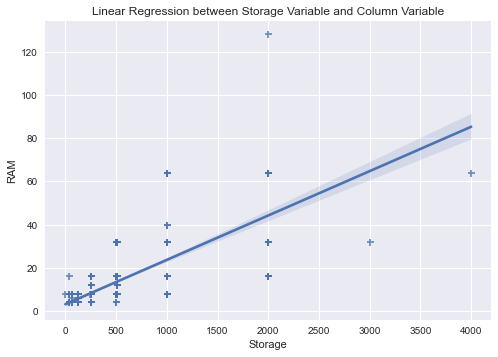

In [142]:
# Simple Linear regression berween Storage Size and RAM 
sns.regplot(
    x="Storage", 
    y="RAM", 
    fit_reg=True, 
    marker="+", 
    data=laptop).set_title('Linear Regression between Storage Variable and Column Variable');


<div style="color: #1034A6; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
  this graph creates a scatter plot with a regression line fit between the "Storage" and "RAM" variables from the "laptop" dataset, allowing for visual inspection of the relationship between these two variables 
</div>

In [195]:
lin = linkage(data,method='ward',metric='euclidean')
print(lin)

[[5.90000000e+01 6.10000000e+01 0.00000000e+00 2.00000000e+00]
 [6.00000000e+01 6.20000000e+01 0.00000000e+00 2.00000000e+00]
 [8.20000000e+01 8.40000000e+01 0.00000000e+00 2.00000000e+00]
 ...
 [6.47500000e+03 6.48200000e+03 4.85497351e+04 2.26500000e+03]
 [6.48000000e+03 6.48300000e+03 8.75718525e+04 9.79000000e+02]
 [6.48400000e+03 6.48500000e+03 1.68261358e+05 3.24400000e+03]]


In [204]:
groupes_cah4= fcluster(lin,t=400,criterion='distance')
print(groupes_cah4)

[158 157 155 ...   1   2   2]



<div style="color: #1034A6; font-size: 16px; text-align: left;">
    <h2>Interpretation:</h2>
  The linkage matrix provides insights into the clustering structure, showing the distances between clusters and the order in which they are merged during the hierarchical clustering process.
</div>

C:\Users\farah math\AppData\Local\Temp\ipykernel_26576\664538490.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Cluster')


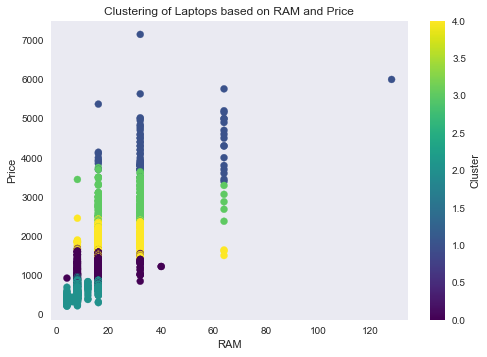

In [208]:
# Select relevant numerical columns
numerical_cols = ['RAM', 'Storage', 'Screen Size', 'Price']
X = laptop[numerical_cols]
# Drop rows with missing values if necessary
X = X.dropna()

# Choose the number of clusters
num_clusters = 5

# Initialize K-means clustering algorithm
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit K-means model and predict cluster labels
cluster_labels = kmeans.fit_predict(X)

# Visualize clusters
plt.scatter(X['RAM'], X['Price'], c=cluster_labels, cmap='viridis')
plt.xlabel('RAM')
plt.ylabel('Price')
plt.title('Clustering of Laptops based on RAM and Price')
plt.grid(False)
plt.colorbar(label='Cluster')
plt.show()

<div style="color: #1034A6; font-size: 16px; text-align: left;">
=> the clustering analysis provides insights into how laptops are grouped based on their specifications, allowing for targeted marketing strategies and better understanding of customer preferences.</br>
The different colors in the scatter plot represent different clusters identified by the K-means algorithm. Each cluster represents a group of laptops with similar specifications.( RAM here )
</div>

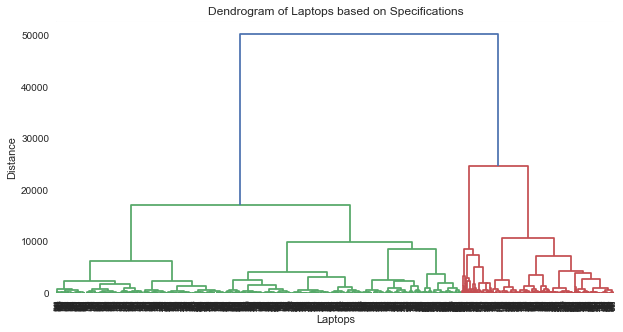

In [215]:
from scipy.cluster import hierarchy
# Perform hierarchical clustering
Z = hierarchy.linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
plt.title('Dendrogram of Laptops based on Specifications')
dendrogram = hierarchy.dendrogram(Z, labels=laptop.index, orientation='top')
plt.xlabel('Laptops')
plt.ylabel('Distance')
plt.show()

<div style="color: #1034A6; font-size: 16px; text-align: left;">
=> The dendrogram provides a visual representation of the hierarchical clustering structure of laptops based on their specifications (RAM, Storage, Screen Size, and Price). Each leaf node in the dendrogram represents an individual laptop, while the branches represent the merging of clusters at different distances.
</div>

In [ ]:
filename="C:\DM Project\lap2"
laptop.to_csv(filename, index=False, encoding='utf-8')